# **LDD 1C-2025**

**Librerías necesarias**

In [96]:
from formulaic import Formula  # Para plantear el modelo lineal
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import sympy as sp
from IPython.display import Markdown  # Para usar latex en strings
from pathlib import Path
from sklearn import linear_model  # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error  # Medidas de desempeño

**Otras**

In [3]:
# # Chequear que activé el entorno correcto
# import sys
# print(sys.executable)  

# # Ver nombres de colores para las visualizaciones
# import matplotlib.colors as mcolors
# display(list(mcolors.CSS4_COLORS.keys()))

## **EJERCICIOS DEL PRIMER CUADERNO**

### Norma
**Ejercicio.** Definir una función que calcule la **norma** (euclideana o **L2**) de un vector. *\[La "L" hace referencia a la teoría de los espacios de Lebesgue]* 

In [4]:
def normaL2(arr):
    return np.round(np.sqrt(np.sum(arr**2)), 2)

v = np.array([1,2,3])
normaL2(v)

np.float64(3.74)

### Azar
**Ley de los grandes números.** Esta ley asegura que si tiramos $n$ veces una moneda, el promedio de veces que sale cara tiende a $1/2$ cuando $n$ tiende a infinito.

Simular 10 lanzamientos de una moneda y calcular el promedio de veces que sale cara. Repetir para $n = 1000$ y $n = 100.000$.

**Ejercicio.** Se tira $n$ veces una moneda. Intentar predecir, si existen, los siguientes límites cuando $n$ tiene a infinito y verificar la intuición mediante simulaciones.

1. La cantidad de caras dividido por la cantidad de cecas:   **\[$\to 1$ cuando $n \to \infty$\]**
2. La cantidad de caras menos la cantidad de cecas:  **\[$\to$ una cantidad cada vez más pequeña de lanzamientos, cuando $n \to \infty$\]**
3. La cantidad de caras menos la cantidad de cecas, divido por la cantidad total de tiradas: **\[$\to 0$ cuando $n \to \infty$\]**
4. Considerando las veces que salieron tres caras seguidas, el promedio de veces que en la siguiente tirada sale nuevamente cara. **\[$\to 0.5$ cuando $n \to \infty$\]**

In [5]:
resultados_posibles = np.array (['cara','ceca'])
lanzamientos = 100000
simulacion = np.random.choice(resultados_posibles, size = lanzamientos)
es_cara = np.where(simulacion == 'cara', True, False)

#1
caras = np.sum(np.where(es_cara == True, 1, 0))
cecas = es_cara.size - caras
rel_caras_cecas = np.round(caras / cecas,3)
print(f'Caras entre cecas: {rel_caras_cecas}')

#2 
print(f'Caras - cecas: {caras - cecas}')

#3
print(f'(Caras - cecas) / tiradas: {np.round((caras - cecas) / lanzamientos, 3)}')


#4
def veces_seguidas(caras):
    indices_caras = np.where(caras == True)[0]
    indices_tres_seguidas = np.where(
        (indices_caras[:-2] - indices_caras[1:-1] == -1) &
        (indices_caras[:-2] - indices_caras[2:] == -2)
    )[0]

    if indices_tres_seguidas.size > 0:
        n = 0
        i = 1
        total3 = 1
        total4 = 0
        while i < indices_tres_seguidas.size:
            if indices_tres_seguidas[i] > n+2:                 
                if caras[i + 1] == True:  # Registro que hubo 4 seguidas
                    total4 += 1            
                total3 += 1 # Registro que hubo 3 seguidas
                n = indices_tres_seguidas[i]  # Actualizo la referencia                
            i += 1
        return total3, total4

veces = veces_seguidas(es_cara)
tres_seguidas = veces[0]
cuatro_seguidas = veces[1]
aux = f'El {np.round((cuatro_seguidas / tres_seguidas) * 100, 2)}% de las veces que salieron tres caras seguidas, '
aux = aux + 'la cuarta tambien fue cara.'
print(aux)

Caras entre cecas: 0.993
Caras - cecas: -376
(Caras - cecas) / tiradas: -0.004
El 50.21% de las veces que salieron tres caras seguidas, la cuarta tambien fue cara.


### Archivos de datos

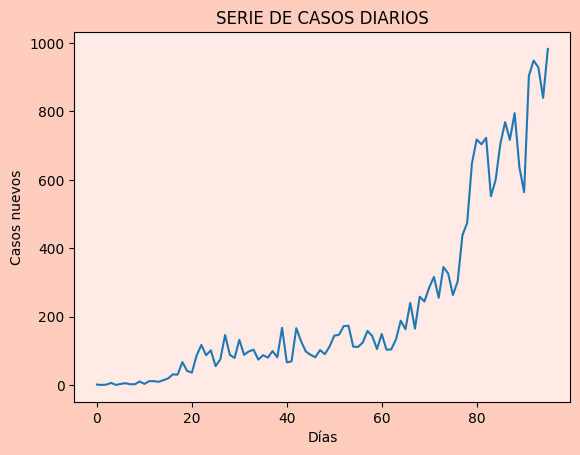

In [6]:
ruta_a_casos = (Path(os.getcwd()) / 'recs' / 'casos_coronavirus.csv').resolve()  # Para que funcione en Windows 

casos_covid = pd.read_csv(ruta_a_casos)  # Dataframe de casos
#casos_covid.head()  # Permite inspeccionar los datos
#casos_covid.info()  # Devuelve índices y estructura del dataframe


# Gráfico 1: serie de casos diariosb
casos_diarios = casos_covid.confirmados_Nuevos.values  # {dataframe}.{columna}.values
plt.plot(casos_diarios)
# Información
plt.title("SERIE DE CASOS DIARIOS")  # Título del gráfico
plt.xlabel('Días')  # Etiqueta del eje horizontal
plt.ylabel('Casos nuevos')  # Etiqueta del eje vertical
# Estilo
ax = plt.gca()  
ax.set_facecolor("#ffeae5")  # Color de fondo del gráfico
plt.gcf().patch.set_facecolor('#ffcdbe')  # Color de fondo del marco
plt.show()

#### **Suma acumulada** 
Consiste en sumar en cada celda el valor actual más todos los registros anteriores de esa columna. Fórmula: <span style='color: #ff3815'>$\displaystyle s_i = \sum_{k=1}^{i} c_k$ </span>

1. $i$ indica el registro para el cual se está calculando la suma *(de 1 hasta i)*.
2. $c_k$ es el valor de la columna en el k-ésimo registro.

---
<span style='color:#11ffbc'>Al suavizar la **fluctuación** entre valores consecutivos de una serie de datos que crece con el tiempo, permite visualizar la **tendencia general**, sin la influencia de las **variaciones a corto plazo** </span>.

---

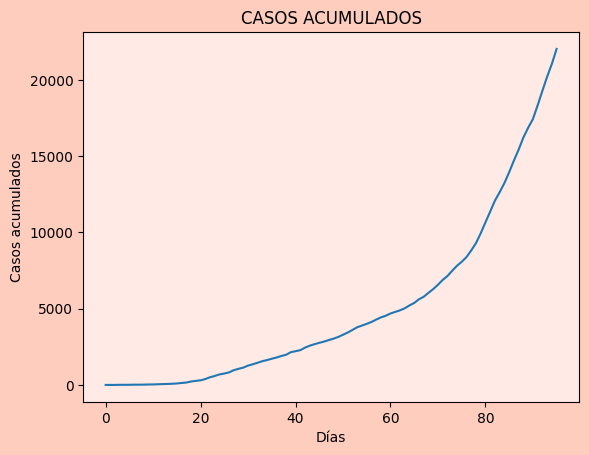

In [7]:
# Gráfico 2: cantidad de casos acumulados
casos_acumulados = casos_diarios.cumsum()  # Suma acumulada
plt.plot(casos_acumulados)
# Información
plt.title("CASOS ACUMULADOS")  # Título del gráfico
plt.xlabel('Días')  # Etiqueta del eje horizontal
plt.ylabel('Casos acumulados')  # Etiqueta del eje vertical
# Estilo
ax = plt.gca()  
ax.set_facecolor("#ffeae5")  # Color de fondo del gráfico
plt.gcf().patch.set_facecolor('#ffcdbe')  # Color de fondo del marco
plt.show()

#### **Linealizar**
En escala logarítmica, los crecimientos **exponenciales** (o con una tendencia similar) se tranforman a una relación aproximadamente **lineal**: el comportamiento de los datos se vuelve más **predecible** al suavizar la curva. La clave es asociar la **pendiente** a la **tasa de cambio** del fenómeno: 

- Pendiente constante $\leadsto$ crecimiento exponencial constante
- Pendiente decreciente $\leadsto$ desaceleración de casos
- Pendiente creciente $\leadsto$ aceleración de casos

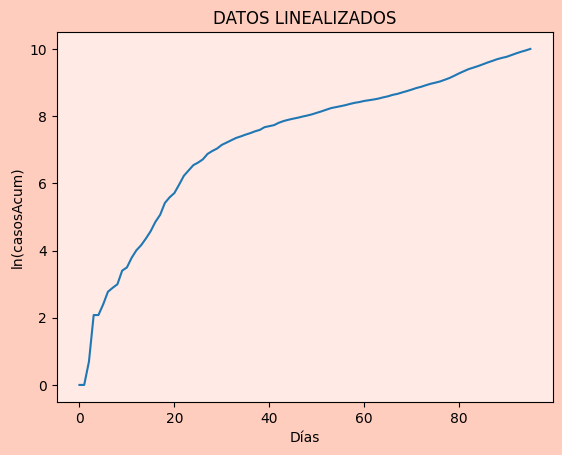

In [8]:
# Gráfico 3: datos linealizados
casos_acum_decim = np.float64(casos_acumulados)  # Enteros a punto flotante
log_casos_acum = np.log(casos_acum_decim)  # Le tomo el logaritmo natural
plt.plot(log_casos_acum)
# Información
plt.title("DATOS LINEALIZADOS")
plt.xlabel('Días')  # Etiqueta del eje horizontal
plt.ylabel('ln(casosAcum)')  # Etiqueta del eje vertical
# Estilo
ax = plt.gca()  
ax.set_facecolor("#ffeae5")  # Color de fondo del gráfico
plt.gcf().patch.set_facecolor('#ffcdbe')  # Color de fondo del marco
plt.show()

##### Linealizar (alt.)

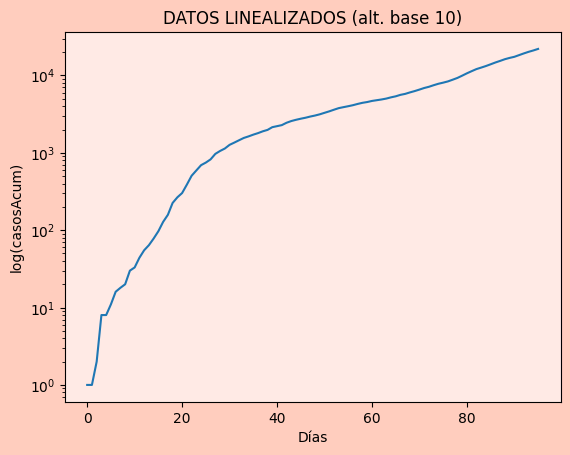

In [9]:
plt.plot(casos_acumulados)
plt.yscale('log')  # En base 10 (ln: plt.yscale('log', basey=np.e))
# Información
plt.title("DATOS LINEALIZADOS (alt. base 10)")  # Título del gráfico
plt.xlabel('Días')  # Etiqueta del eje horizontal
plt.ylabel('log(casosAcum)')  # Etiqueta del eje vertical
# Estilo
ax = plt.gca()  
ax.set_facecolor("#ffeae5")  # Color de fondo del gráfico
plt.gcf().patch.set_facecolor('#ffcdbe')  # Color de fondo del marco
plt.show()

## **EJERCICIOS GUÍA 3**: *visualización*

### Ejercicio 1

#### a) Curva de la expectativa de vida en Argentina en función del año *(datos de Gapminder)*

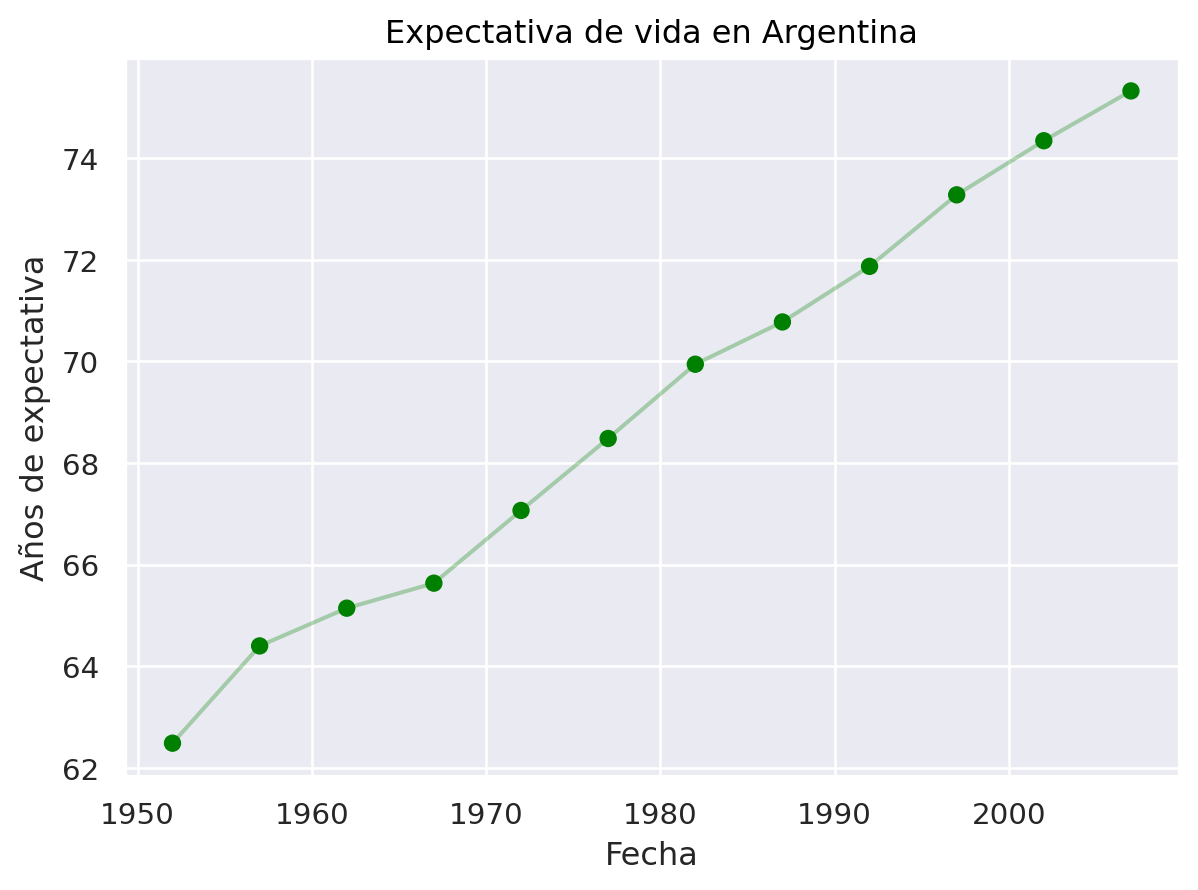

In [10]:
from gapminder import gapminder

# Obtengo los datos
datos_arg = gapminder[gapminder['country']=='Argentina'].reset_index(drop=True)

# Visualizo
(
    so.Plot(data=datos_arg, x='year', y='lifeExp')
    .add(so.Line(color='green', alpha=0.3))
    .add(so.Dot(color='green', alpha=1))
    .label(
        x="Fecha",
        y="Años de expectativa",
        title="Expectativa de vida en Argentina"
    )
)

#### b) Curvas de la expectativa de vida de los paı́ses de América en función del año

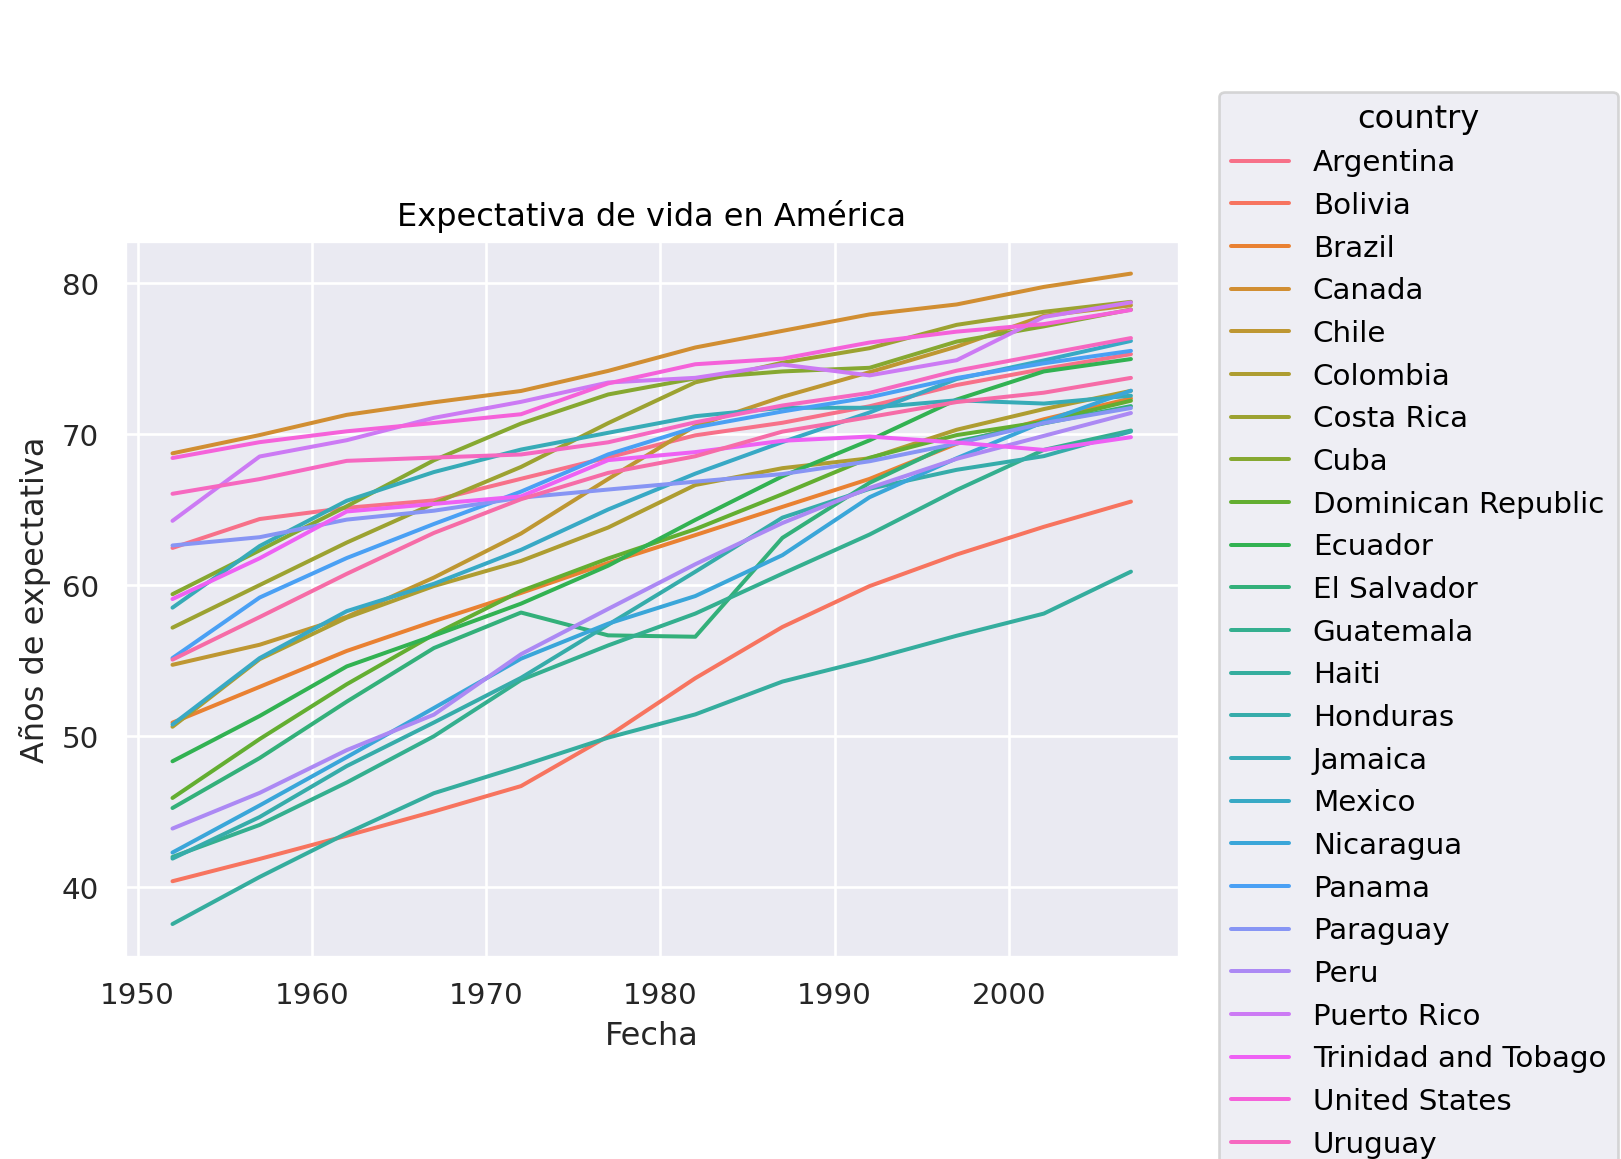

In [11]:
datos_america = gapminder[gapminder['continent'] == 'Americas']

(
    so.Plot(data=datos_america, x='year', y='lifeExp', group='country', color='country')
    .add(so.Line())
    .label(
        x="Fecha",
        y="Años de expectativa",
        title="Expectativa de vida en América"
    )
)

#### c) Curva de tendencia

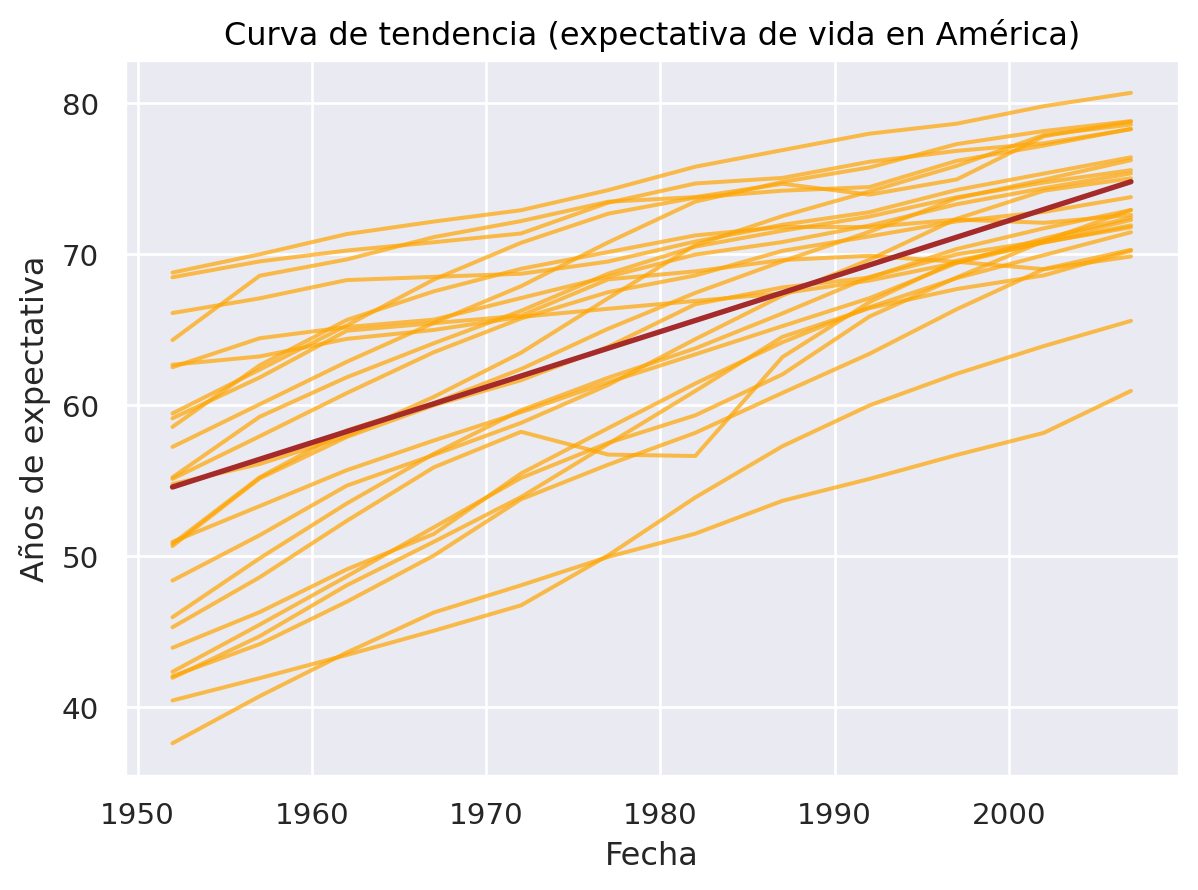

In [12]:
(
    so.Plot(data=datos_america, x='year', y='lifeExp')
    .add(so.Line(color='orange', alpha=0.7), group='country')
    .add(so.Line(color='brown', linewidth=2), so.PolyFit(1))  # Con '2' genero regresión cudrática en lugar de lineal
    .label(
        x="Fecha",
        y="Años de expectativa",
        title="Curva de tendencia (expectativa de vida en América)"
    )
)

#### d) Curvas de expectativa agrupadas por continente

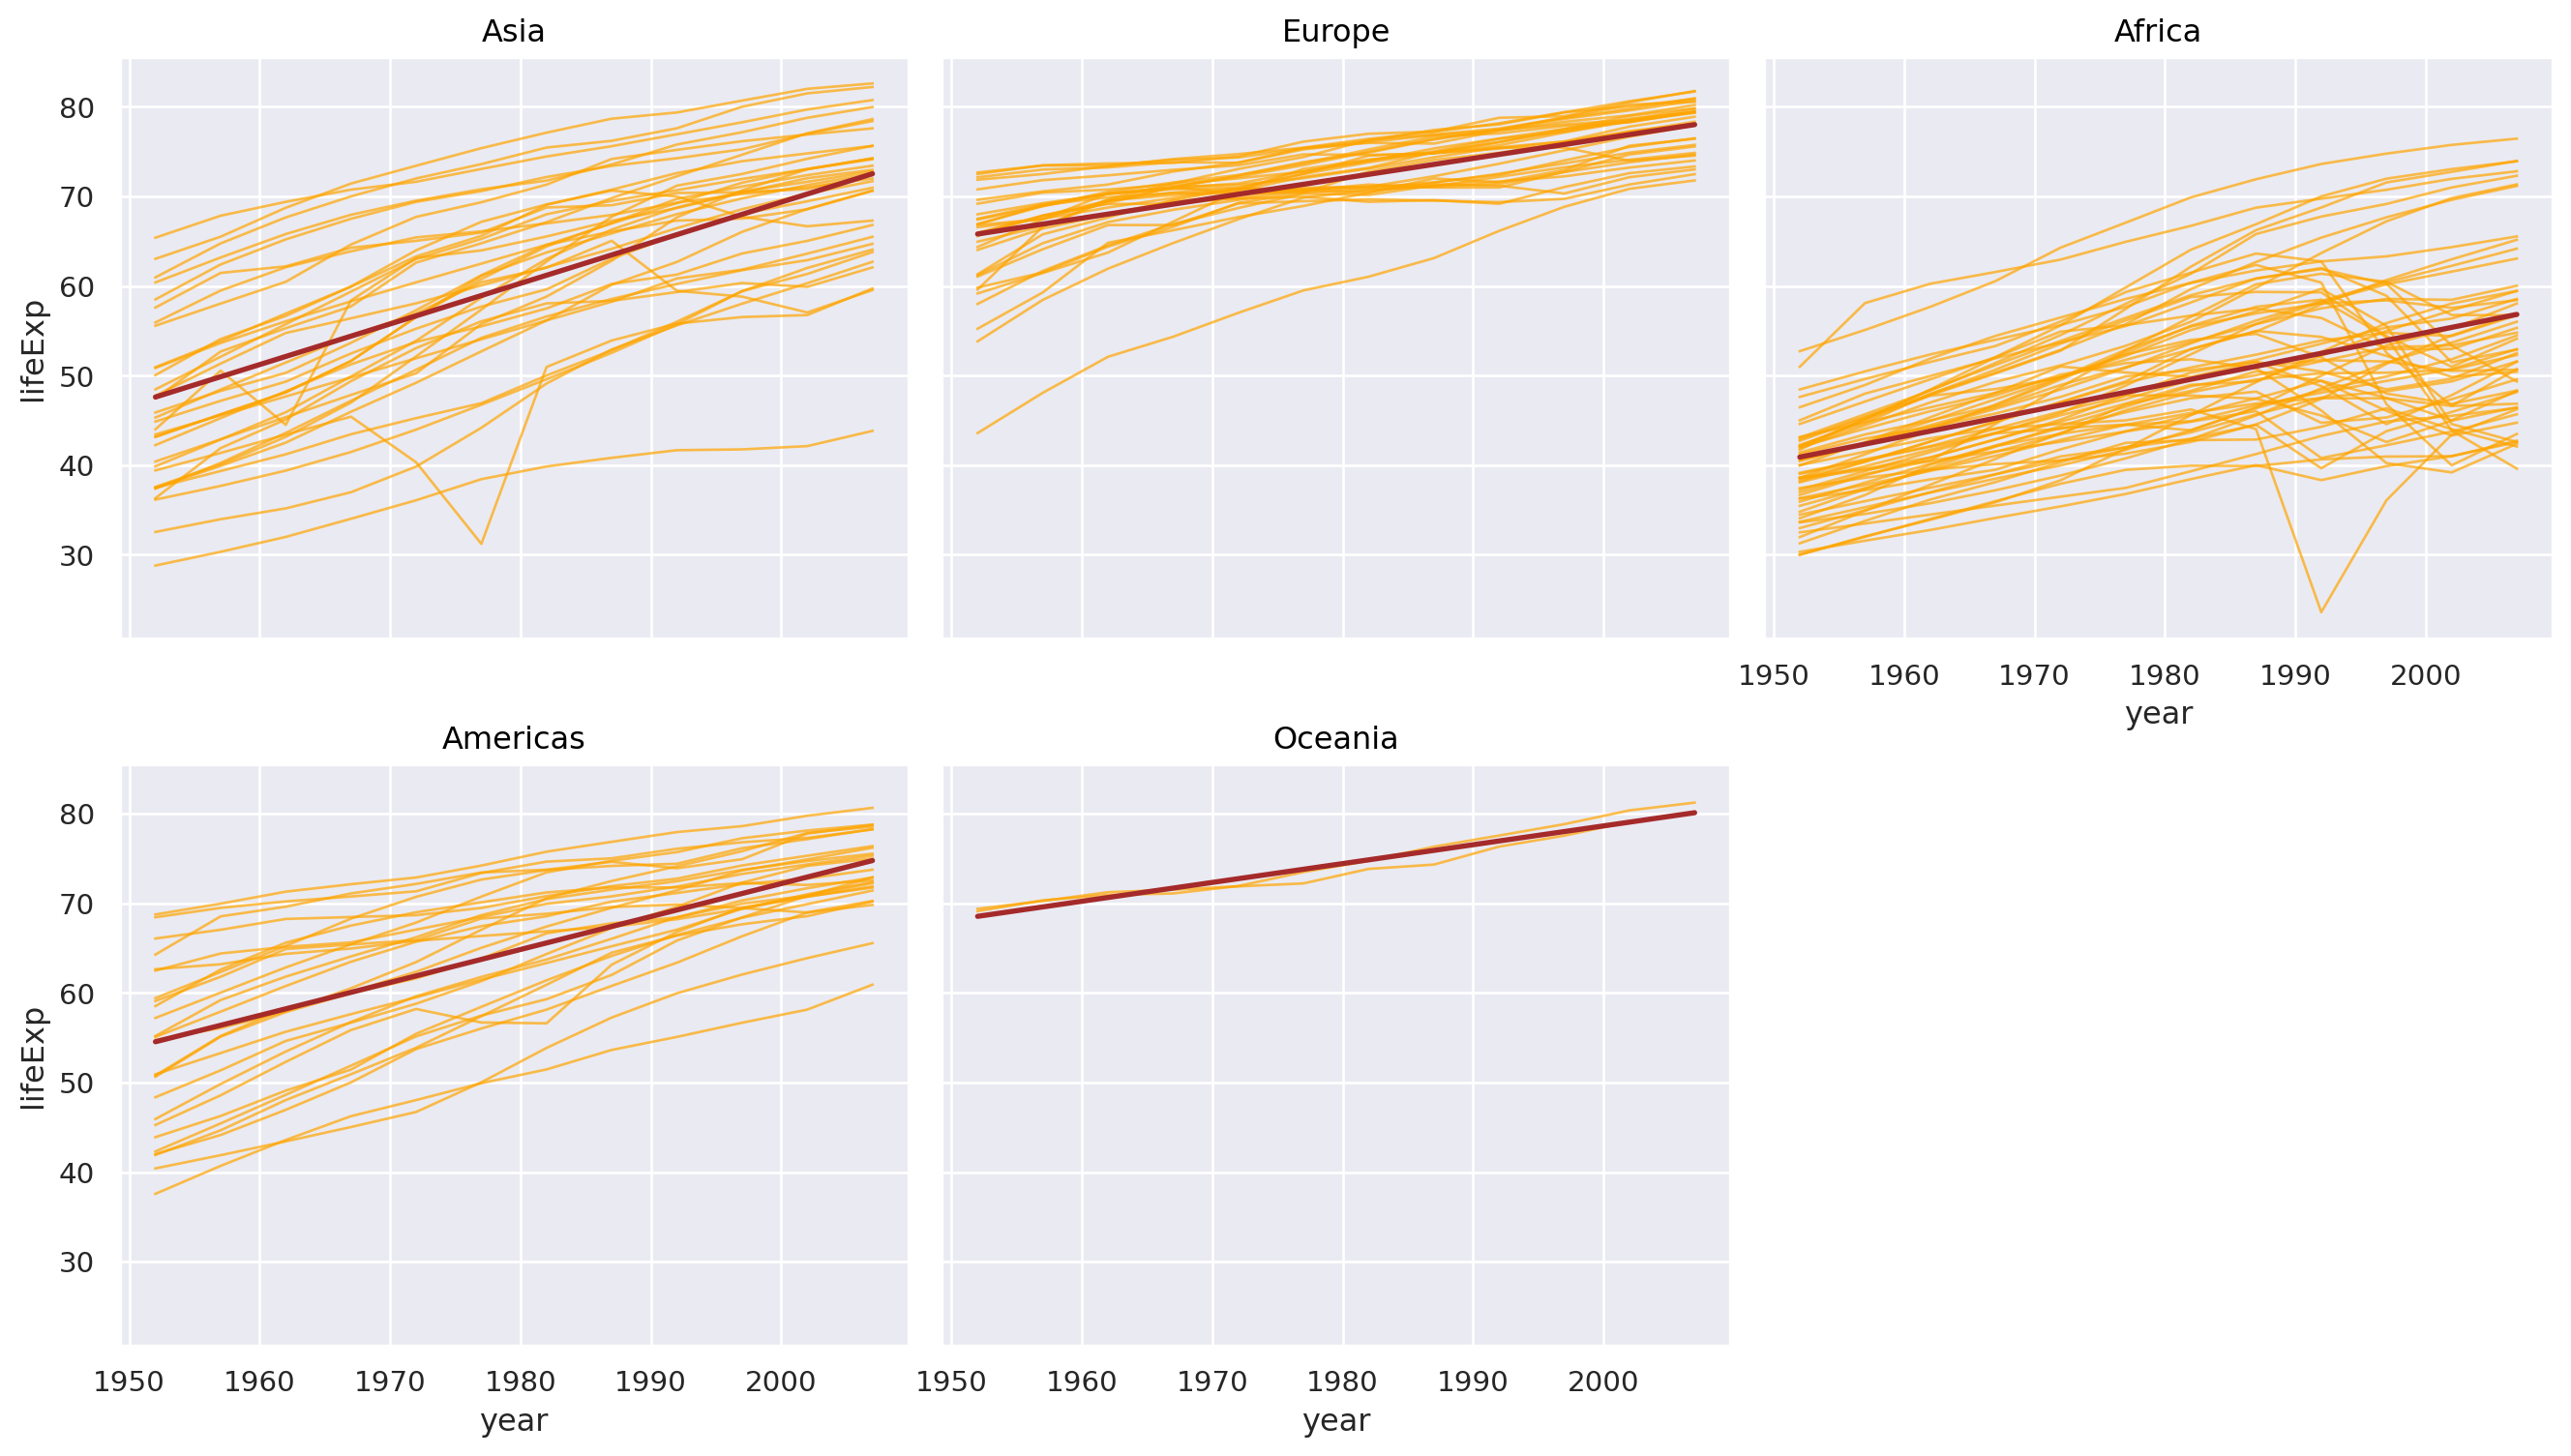

In [13]:
(
    so.Plot(data = gapminder, x='year', y='lifeExp')
    .add(so.Lines(color='orange', alpha=0.7, linewidth=1), group='country')
    .add(so.Line(color='brown', linewidth=2), so.PolyFit(1))
    .facet('continent', wrap=3)
    .layout(size=(14, 8))
)

### Ejercicio 2

In [37]:
pings = sns.load_dataset('penguins') 
print(pings)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

### Ejercicio 3

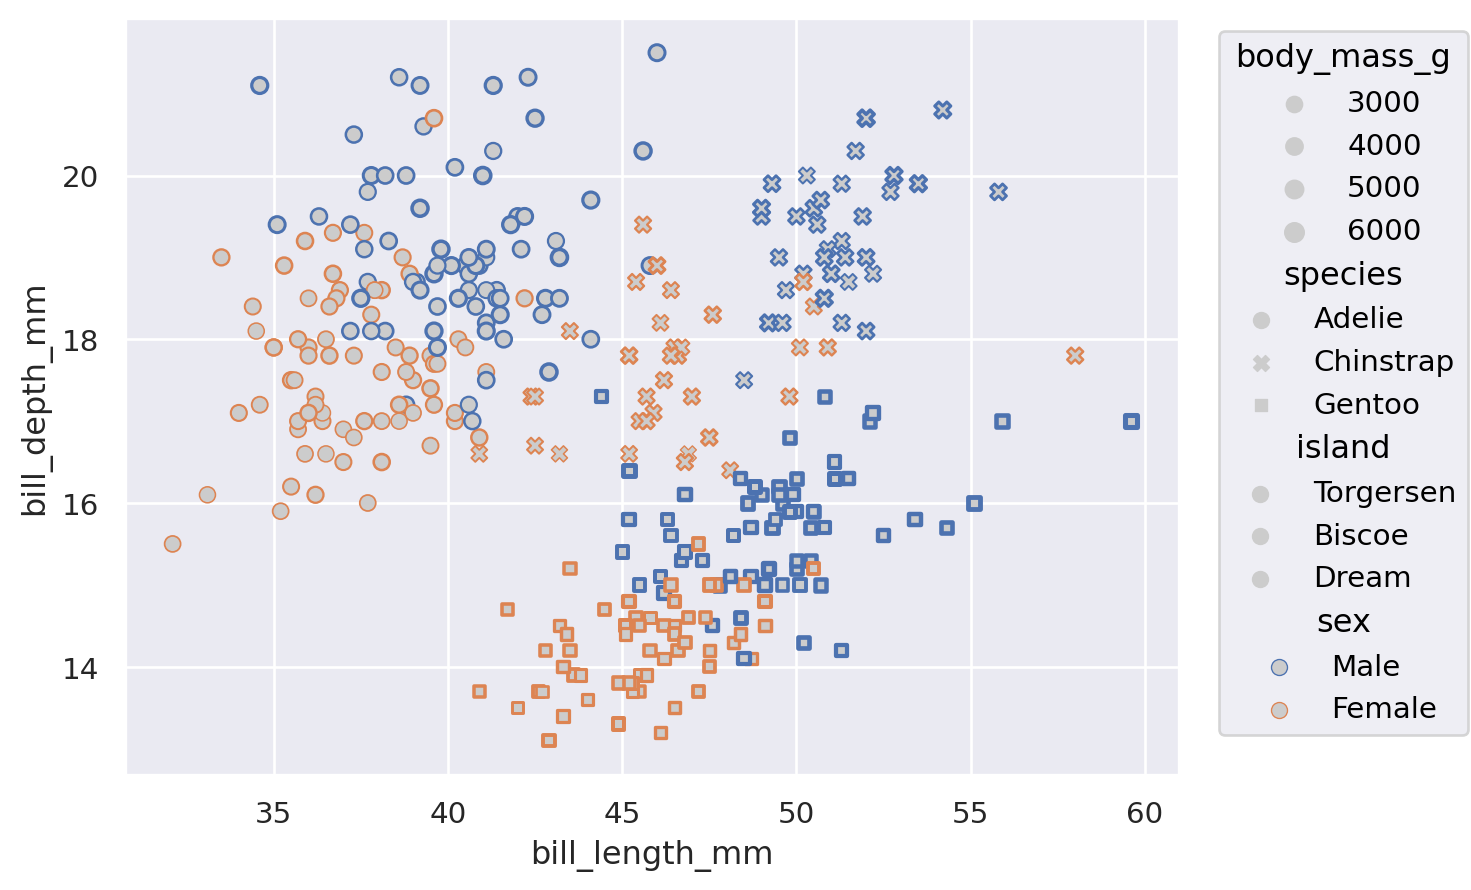

In [15]:
(
    so.Plot(
        data=pings, x='bill_length_mm', y='bill_depth_mm',
        edgewidth='body_mass_g', marker='species',
        linestyle='island', color='species'
    )
    .add(so.Dot(color='.8'), edgecolor='sex')
)

### Ejercicio 4
Al codificar la especie por medio del color de la marca, se entiende mejor la distribución de los datos en subgrupos.


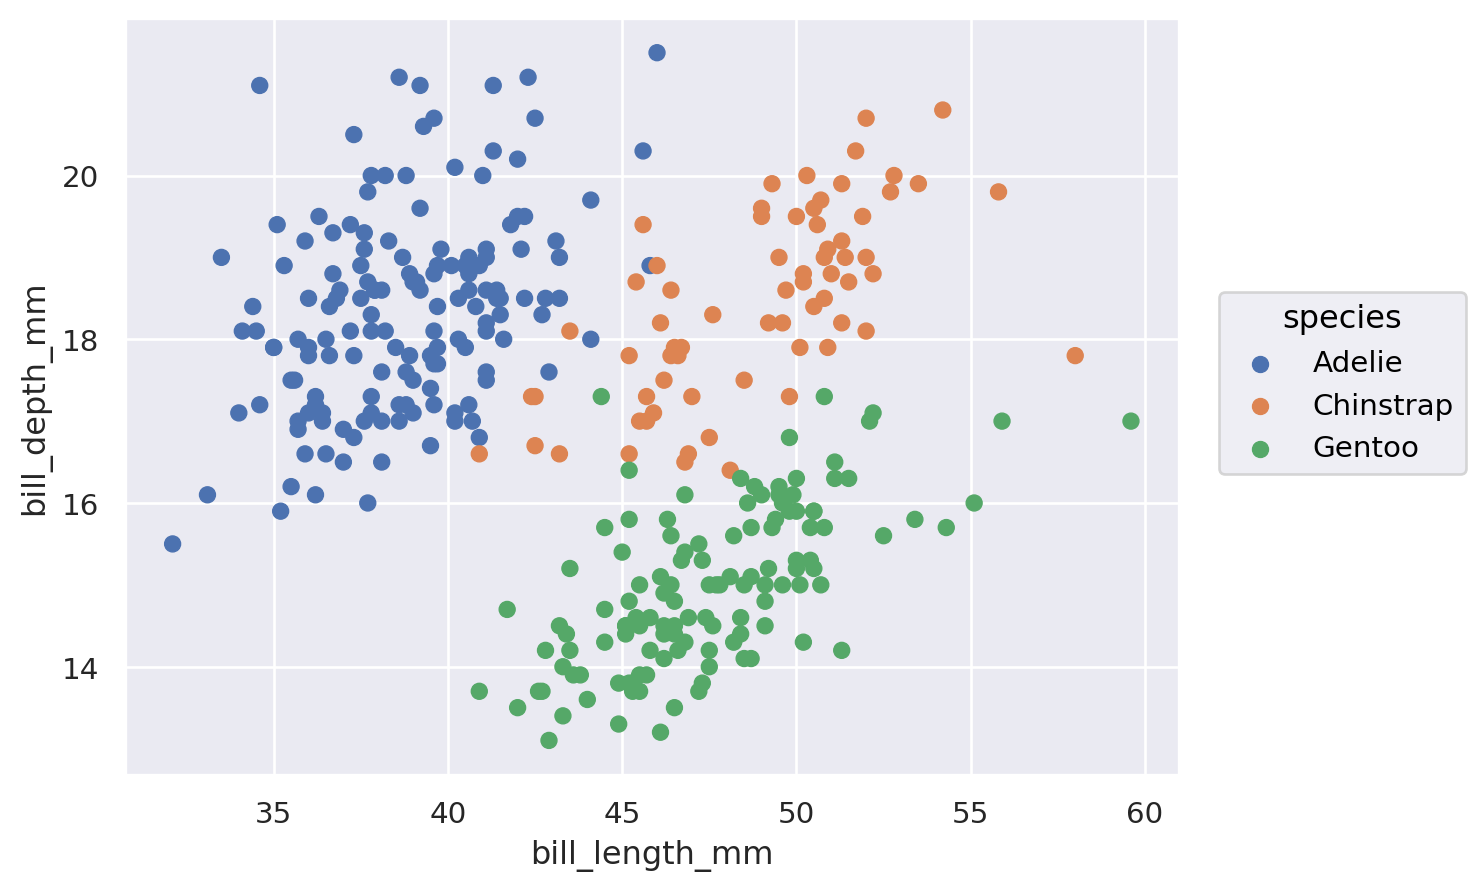

In [16]:
(
    so.Plot(data=pings, x='bill_length_mm', y='bill_depth_mm')
    .add(so.Dot(), color='species')
)

### Ejercicio 5

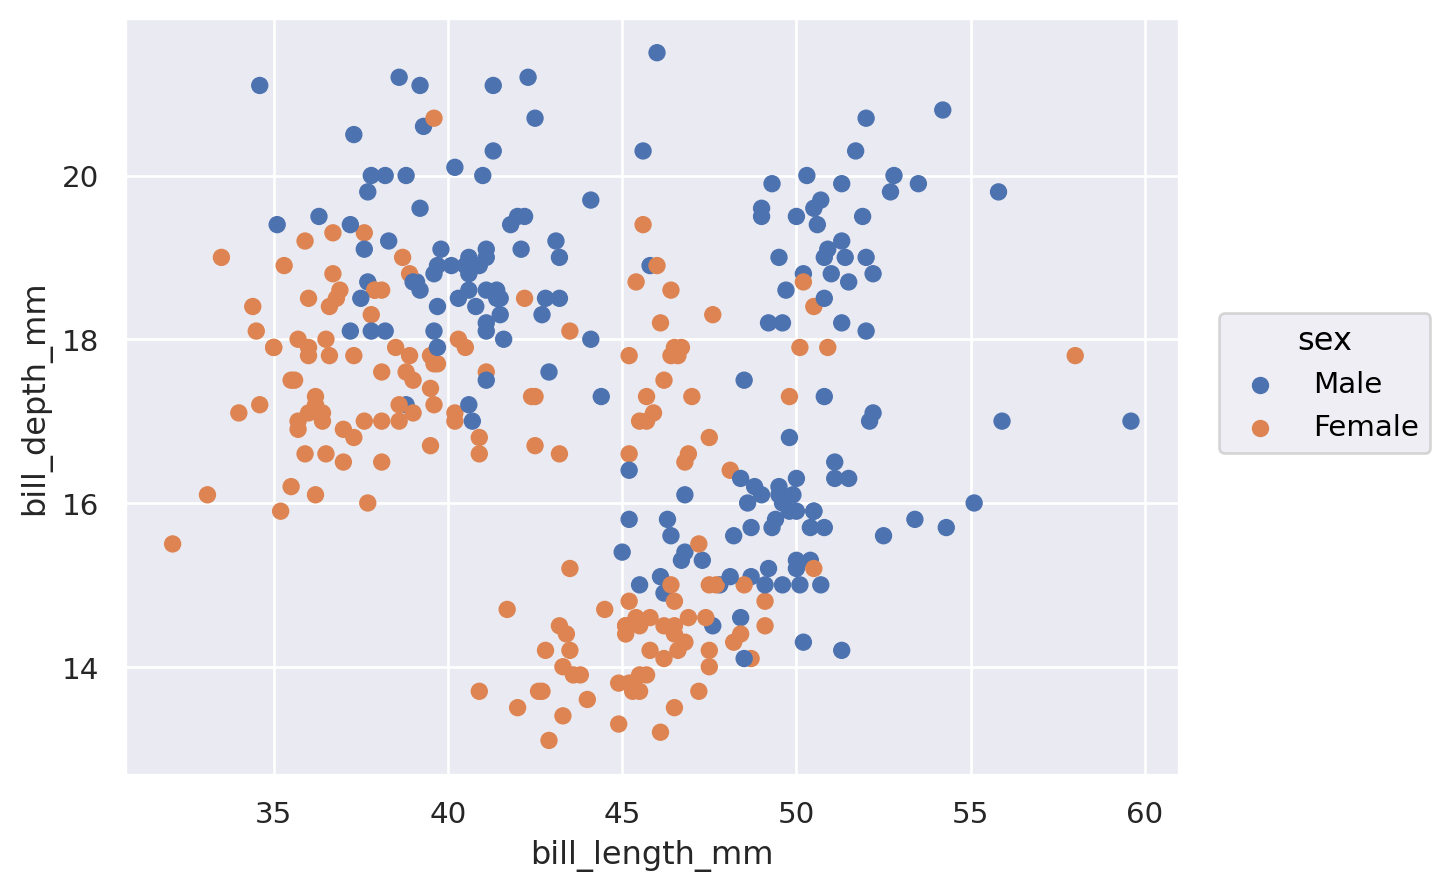

In [43]:
(
    so.Plot(data=pings, x='bill_length_mm', y='bill_depth_mm')
    .add(so.Dot(), color='sex')
)

#### a)
En cada especie, los machos tienden a tener el pico más grande.

#### b)

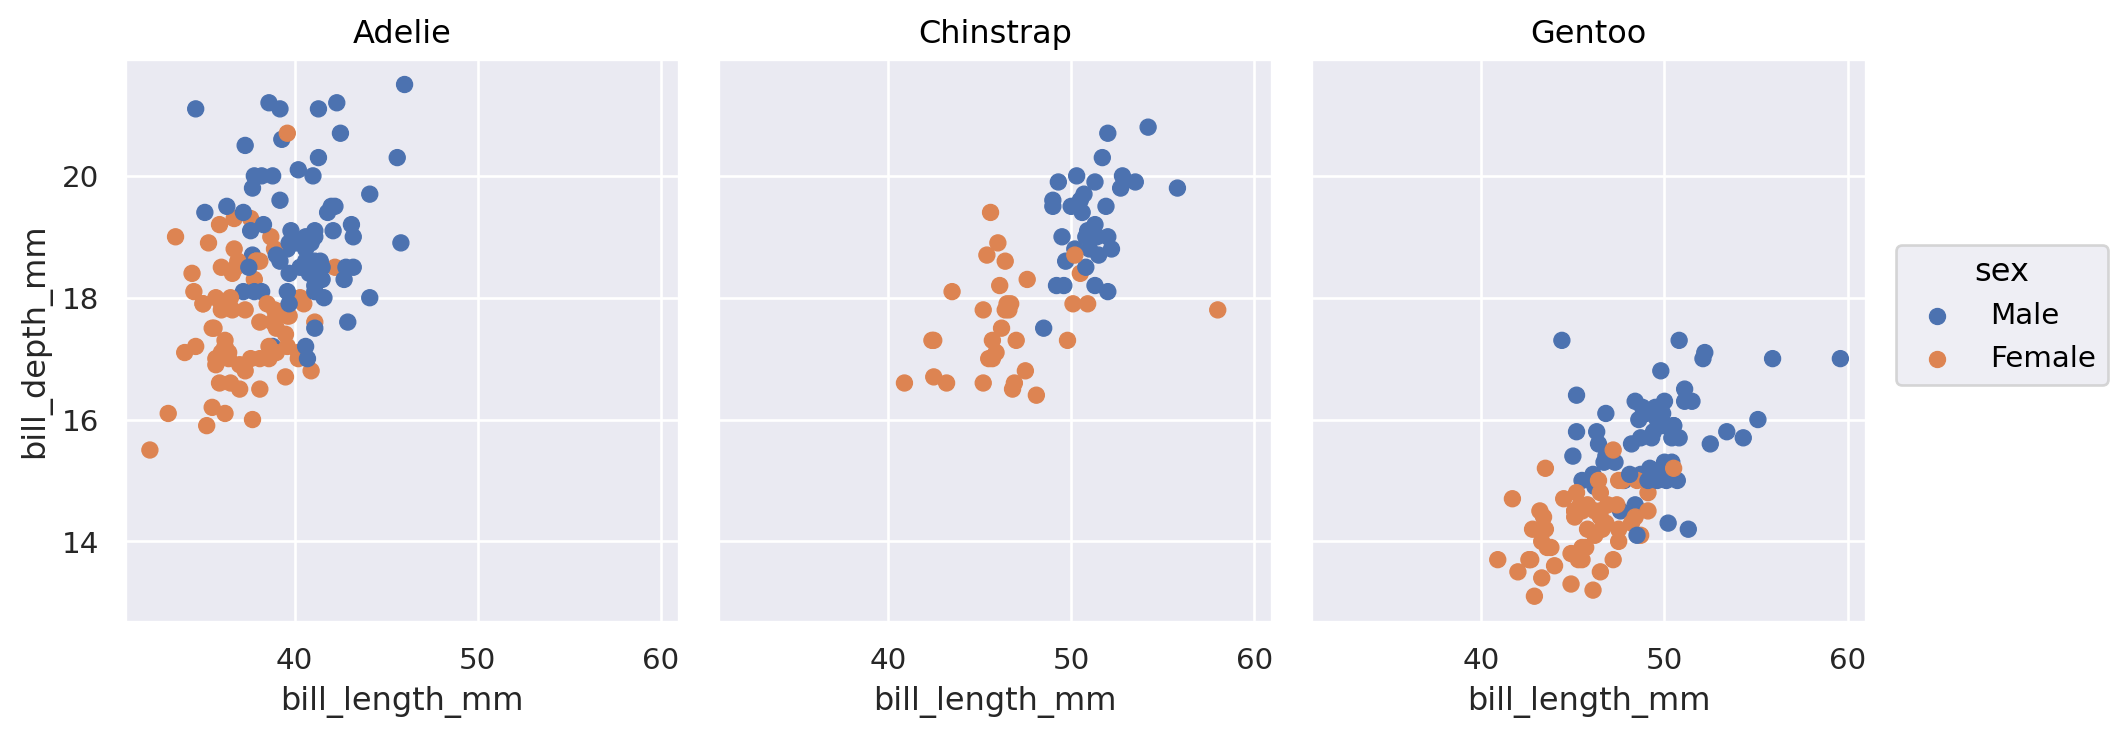

In [18]:
(
    so.Plot(data=pings, x='bill_length_mm', y='bill_depth_mm')
    .add(so.Dot(), color='sex')
    .facet('species')
    .layout(size=(10, 4))
)

### Ejercicio 6
#### a)

In [19]:
pings.groupby('island').size()

island
Biscoe       168
Dream        124
Torgersen     52
dtype: int64

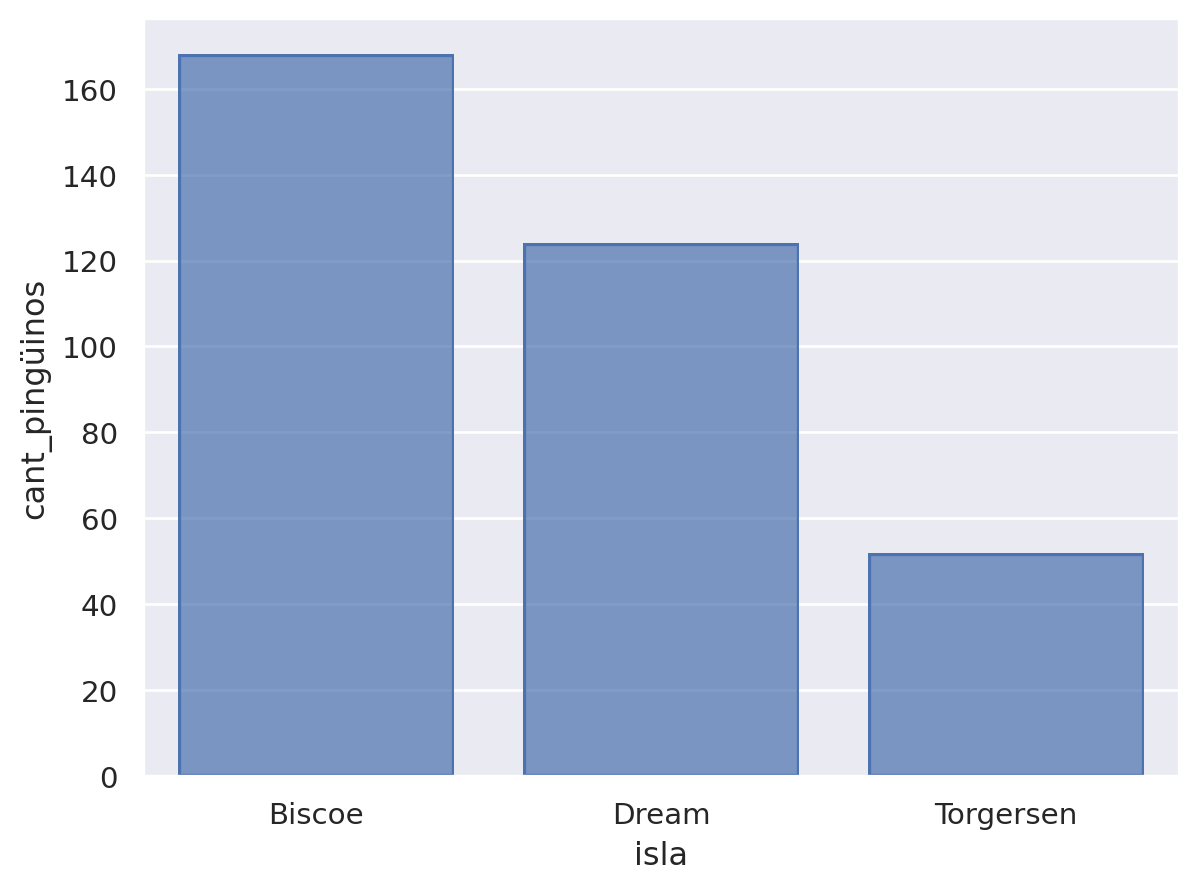

In [51]:
pings_por_isla = pings.groupby('island').size().reset_index(name='cant_pingüinos')
pings_por_isla.rename(columns={'island':'isla'}, inplace=True)
# display(pings_por_isla)

(
    so.Plot(data=pings_por_isla, x='isla', y='cant_pingüinos')
    .add(so.Bar())
)

#### c, d) 
Puedo hacer el **histograma** directamente, donde *"el tamaño de la barra representa la cantidad de veces que se repite cada valor de la variable categórica en la serie"*: el **eje y** codifica **cantidades** o **frecuencias**.

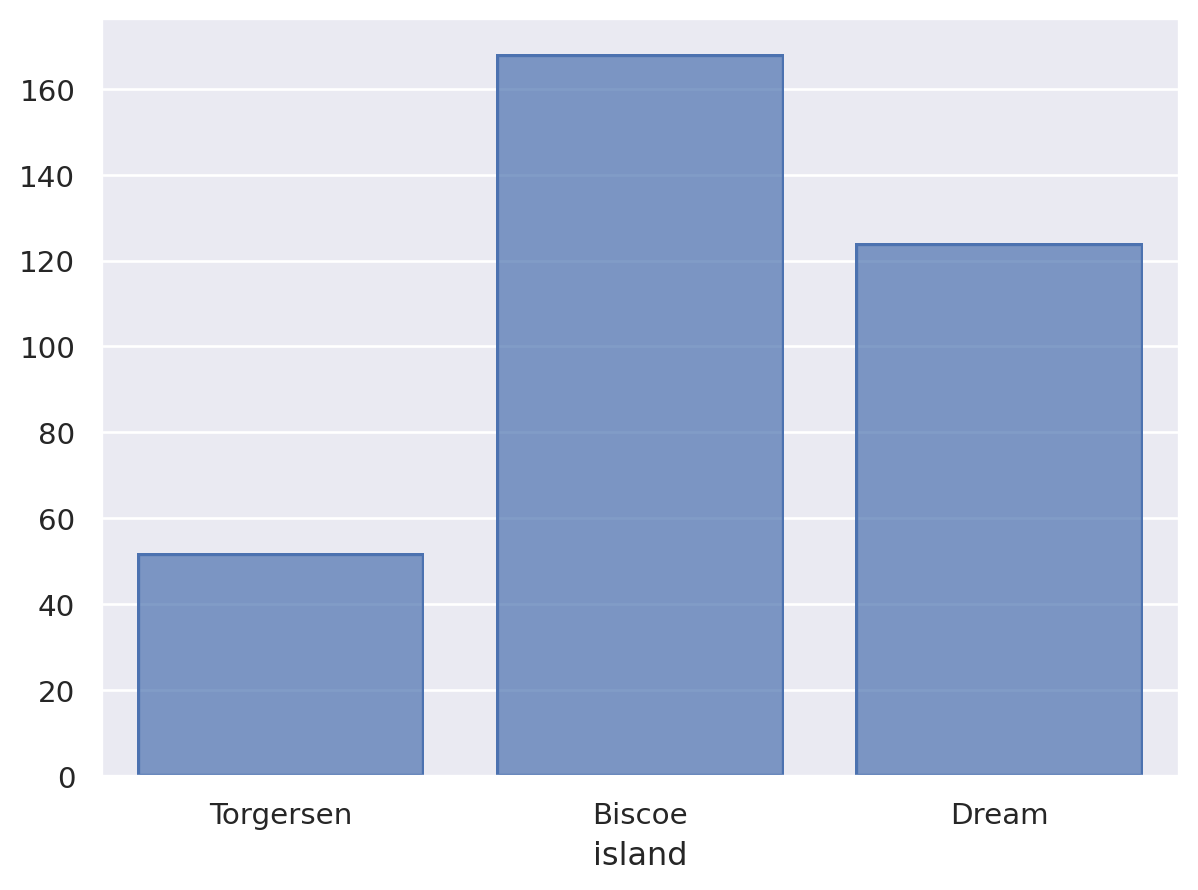

In [53]:
(
    so.Plot(data = pings, x='island')
    .add(so.Bar(), so.Hist())
)

#### e)

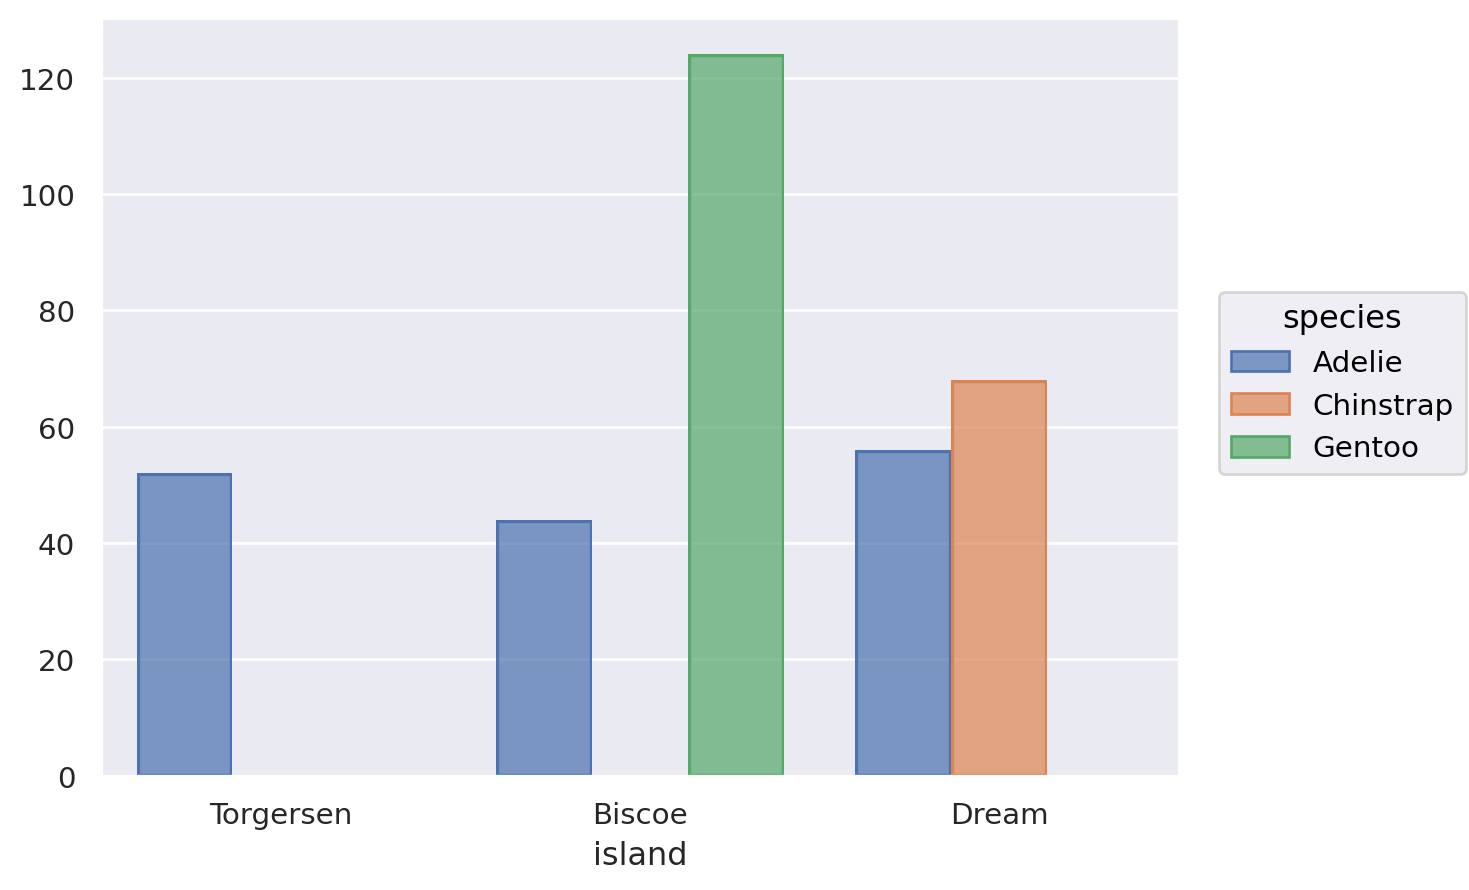

In [58]:
(
    so.Plot(data=pings, x='island')
    # Dodge crea barras distintas según las categorías
    # especifícadas en color='...'
    .add(so.Bar(), so.Hist(), so.Dodge(), color='species')  
)

#### f)
Misma visualización pero usando `facet()`

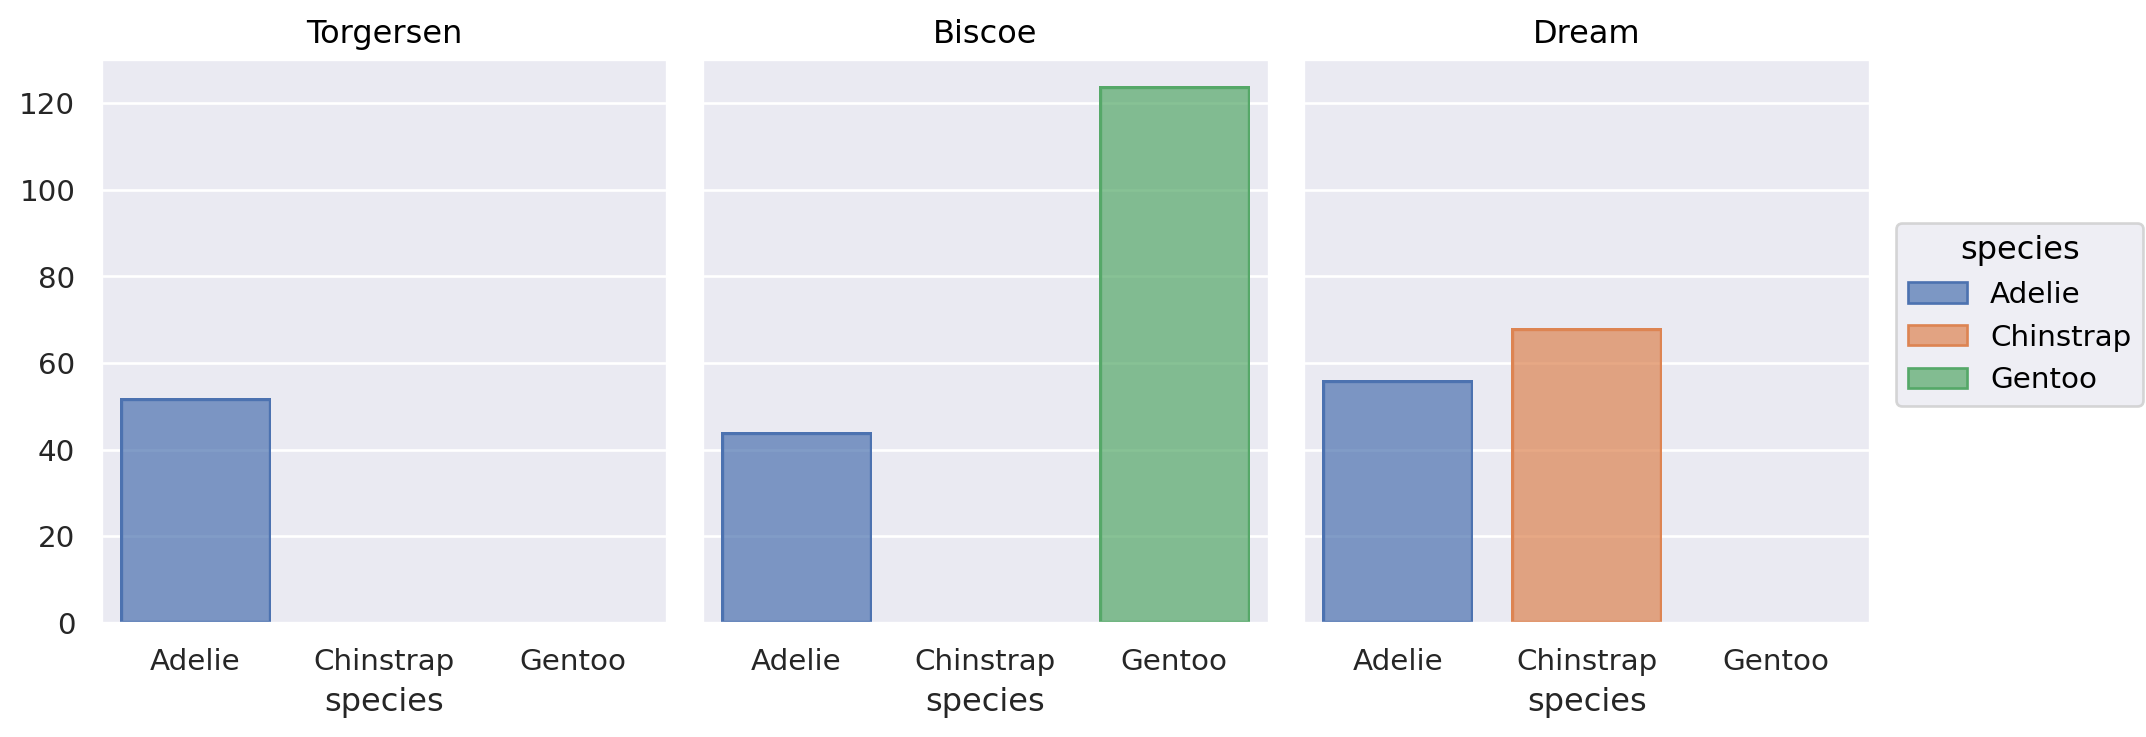

In [61]:
(
    so.Plot(data=pings, x='species', color='species')
    .add(so.Bar(), so.Hist())
    .facet('island')
    .layout(size=(10, 4))
)

### Ejercicio 7
**Histograma** de la cantidad de pingüinos en función del tamaño del ala.

Tamaño del ala |  Máximo : 231.0; mínimo: 172.0; media: 200.91520467836258; mediana: 197.0


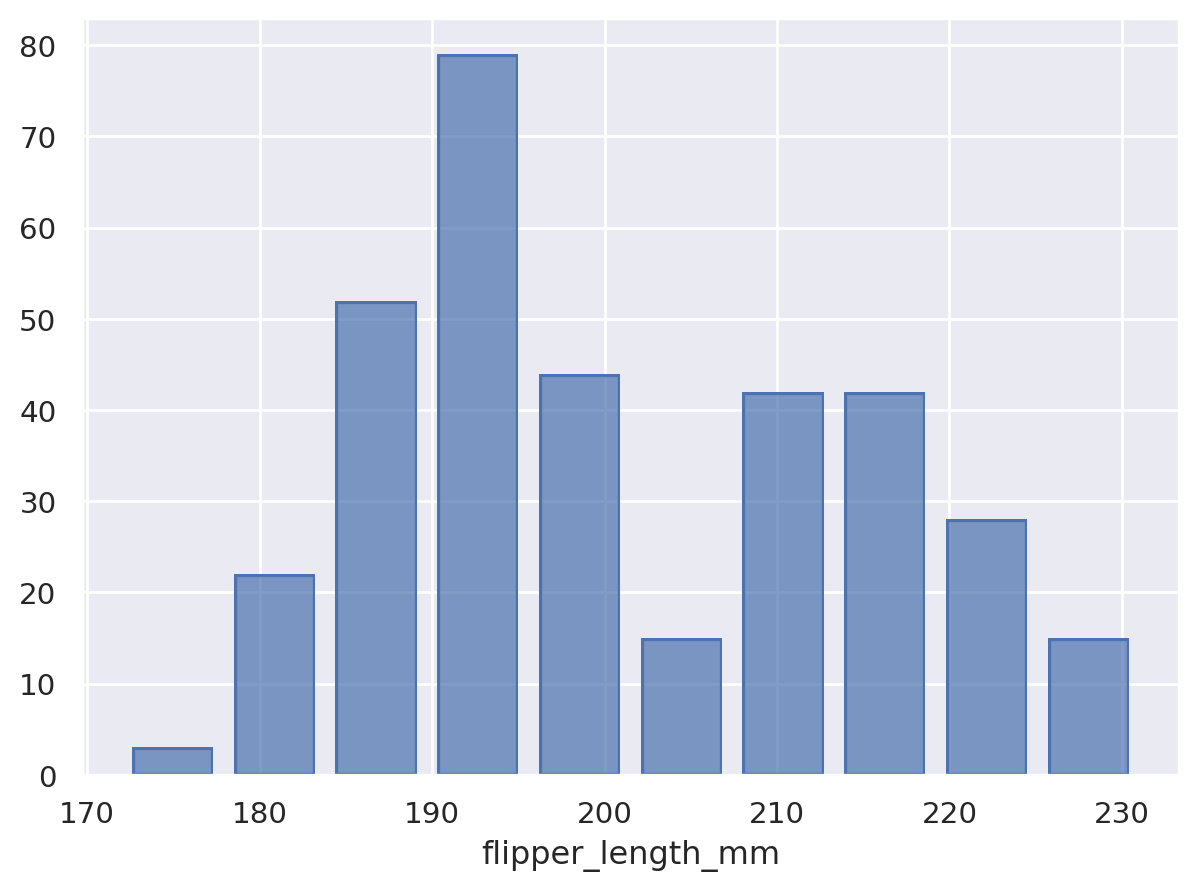

In [71]:
maximo = pings['flipper_length_mm'].max()
minimo = pings['flipper_length_mm'].min()
media = pings['flipper_length_mm'].mean()
mediana = pings['flipper_length_mm'].median()

print(f'Tamaño del ala |  Máximo : {maximo}; mínimo: {minimo}; media: {media}; mediana: {mediana}')
(
    so.Plot(data=pings, x='flipper_length_mm')
    .add(so.Bar(), so.Hist())
)


### Ejercicio 8
#### a)

In [92]:
mtc = 'Medidas de tendencia central'
maximo = pings['bill_depth_mm'].max()
minimo = pings['bill_depth_mm'].min()
media = pings['bill_depth_mm'].mean()
mediana = pings['bill_depth_mm'].median()
moda = pings['bill_depth_mm'].mode().item()  # Funciona porque solo hay una moda

mdd = 'Medidas de dispersión'
varianza = pings['bill_depth_mm'].var()
desvio = pings['bill_depth_mm'].std()

print(f'{'-'*len(mtc)}\n{mtc}\n{'-'*len(mtc)}')
print(f'Máximo : {maximo}\nMínimo: {minimo}\nMedia: {np.round(media,3)}\nMediana: {mediana}\nModa: {moda}\n')
print(f'{'-'*len(mdd)}\n{mdd}\n{'-'*len(mdd)}')
print(f'Varianza: {np.round(varianza, 3)}\nDesvío estándar: {np.round(desvio,3)}')

----------------------------
Medidas de tendencia central
----------------------------
Máximo : 21.5
Mínimo: 13.1
Media: 17.151
Mediana: 17.3
Moda: 17.0

---------------------
Medidas de dispersión
---------------------
Varianza: 3.9
Desvío estándar: 1.975


#### b)

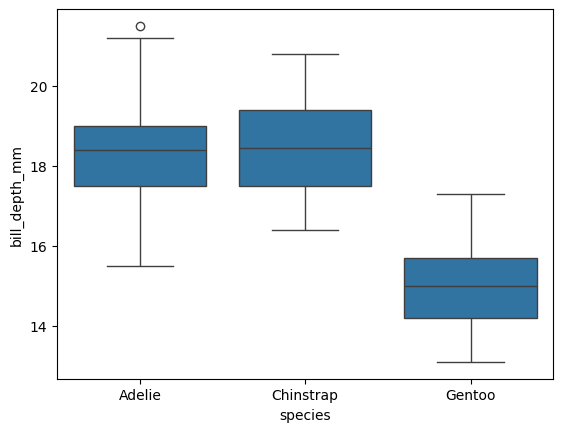

In [77]:
sns.boxplot(data=pings, x='species', y='bill_depth_mm')
plt.show()

### Ejercicio 9
#### a) 
En la especie Adelie la relación entre peso corporal y tamaño del pico (profundidad y longitud) resulta clara. En la especie Chinstrap los puntos parecen estar más dispersos, la relación resulta menos clara. En la especie Gentoo es donde hay menos variación en el peso, aunque puede notarse una tendencia picos más grandes en los individuos con más peso. En cada especie la relación general es que a mayor longitud mayor profundidad. 

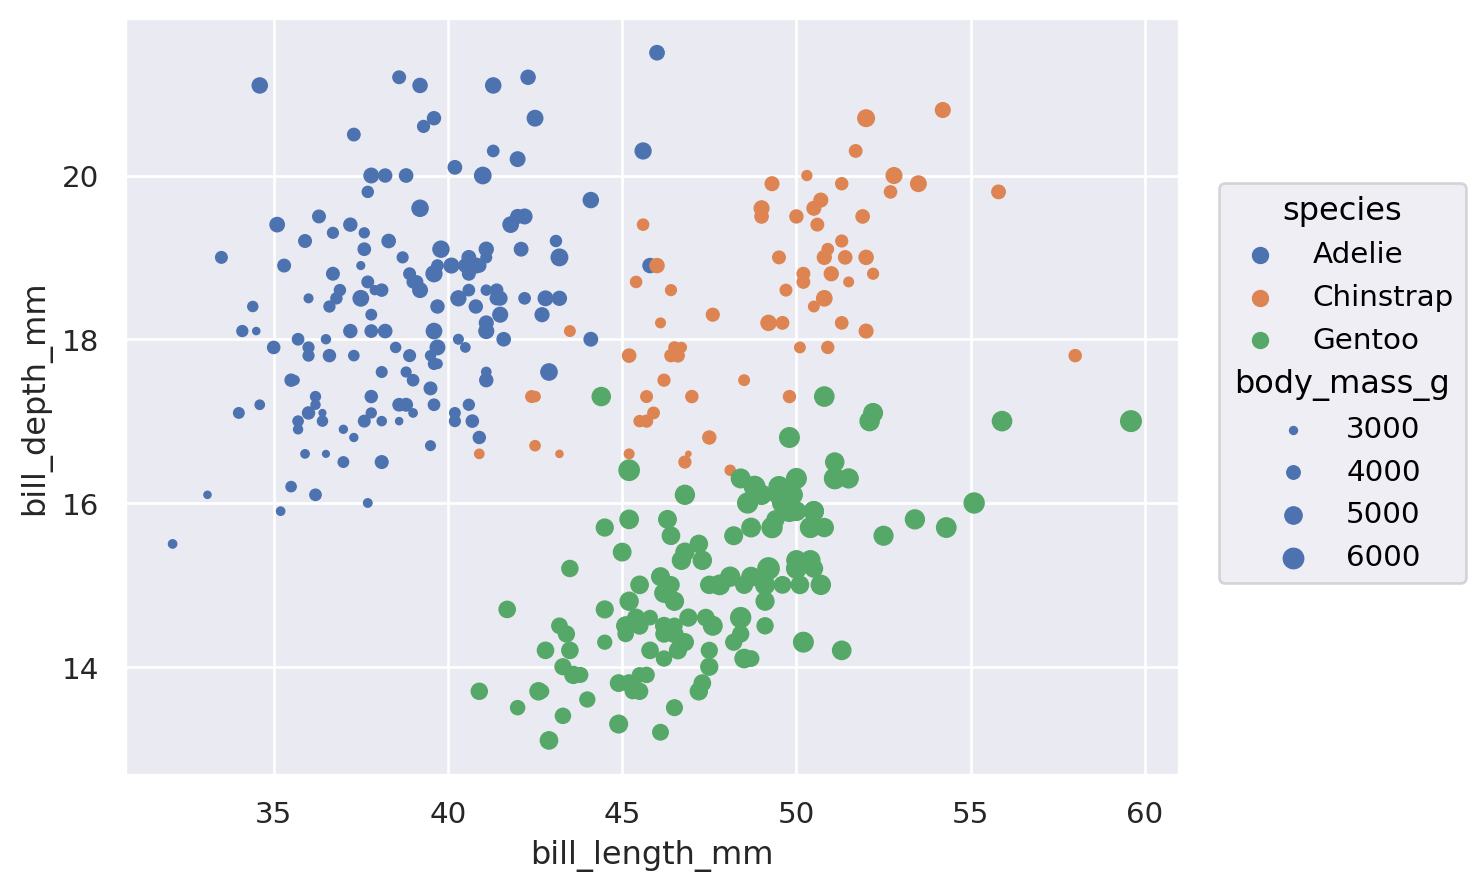

In [93]:
(
    so.Plot(data=pings, x='bill_length_mm', y='bill_depth_mm')
    .add(so.Dot(), color='species', pointsize='body_mass_g')
)

#### b)
El 50% de los individuos de la especie Gentoo pesan entre 4600 y 5500 gramos aprox, superando a buena parte de las otras dos especies.

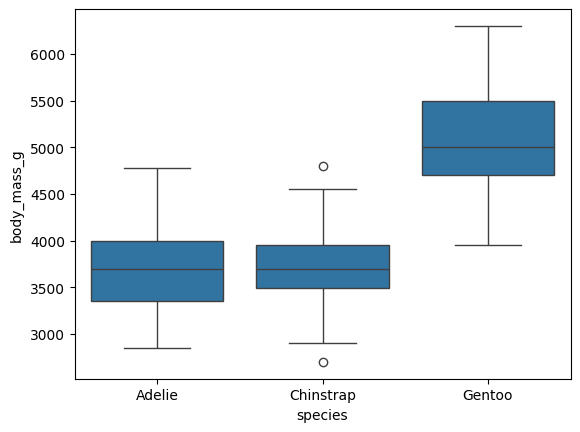

In [94]:
sns.boxplot(data=pings, x='species', y='body_mass_g')
plt.show()

### Ejercicio 12
#### a)

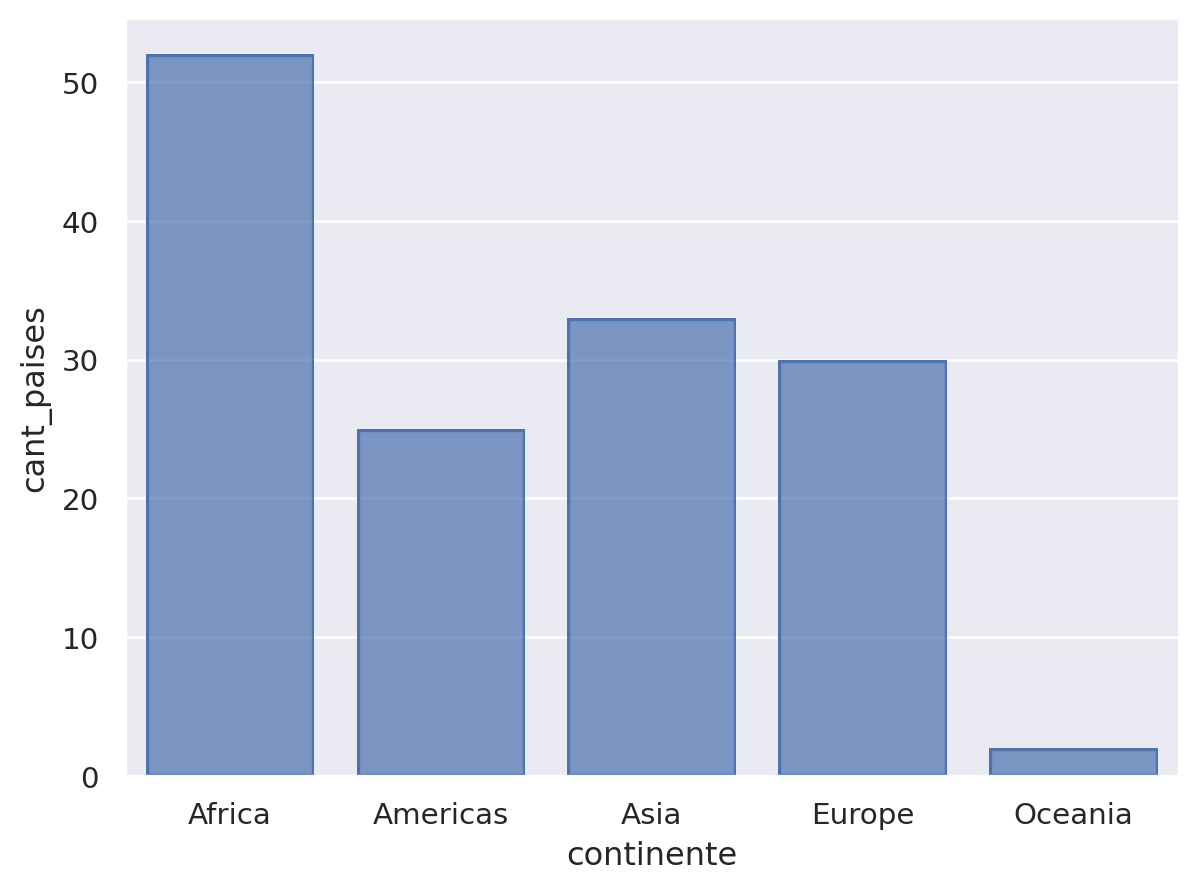

In [112]:
paises = gapminder.groupby('continent')['country'].nunique().reset_index(name='cant_paises')
paises.rename(columns={'continent':'continente'}, inplace=True)

(
    so.Plot(data=paises, x='continente', y='cant_paises')
    .add(so.Bar())
)

#### b)

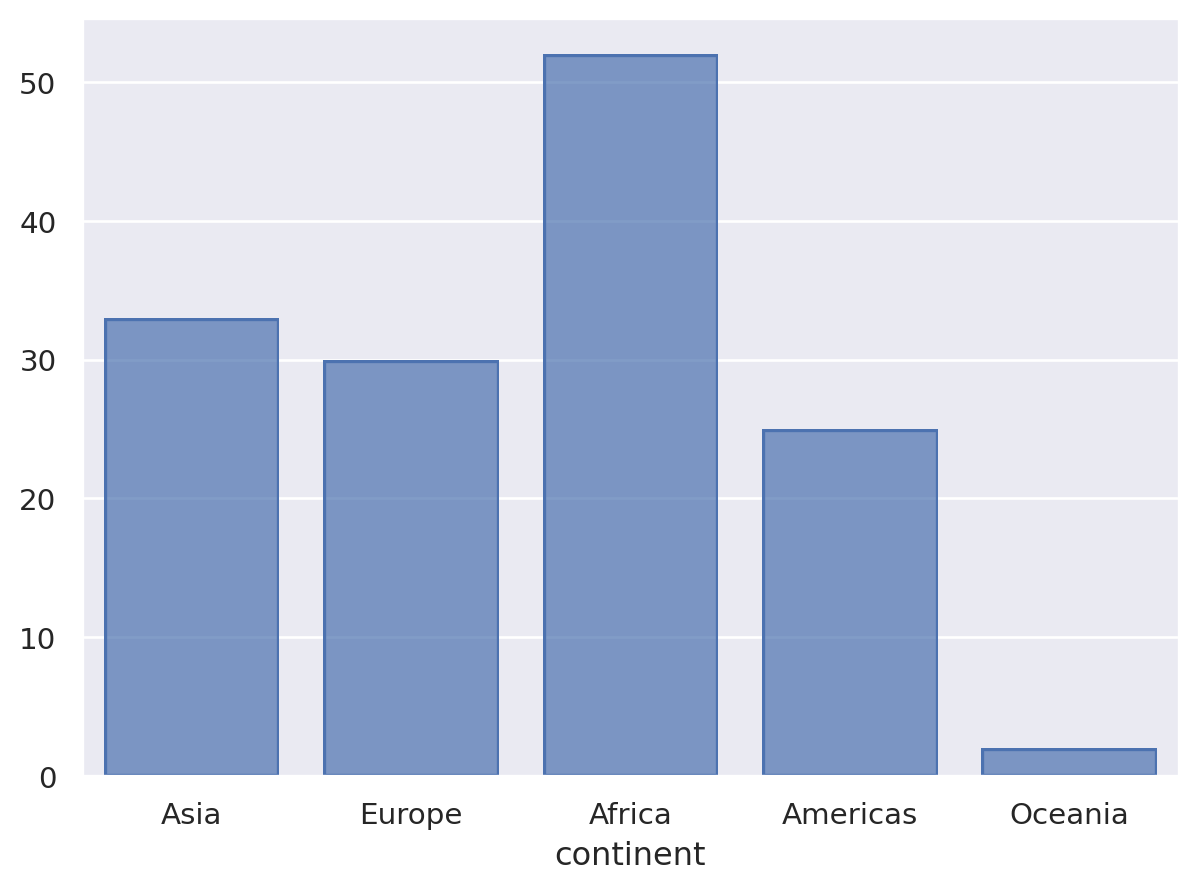

In [126]:
(
    so.Plot(data=gapminder.drop_duplicates(subset='country'), x='continent')  # Solo me quedo con la primera aparición de cada país
    .add(so.Bar(), so.Hist())
)

### Ejercicio 13

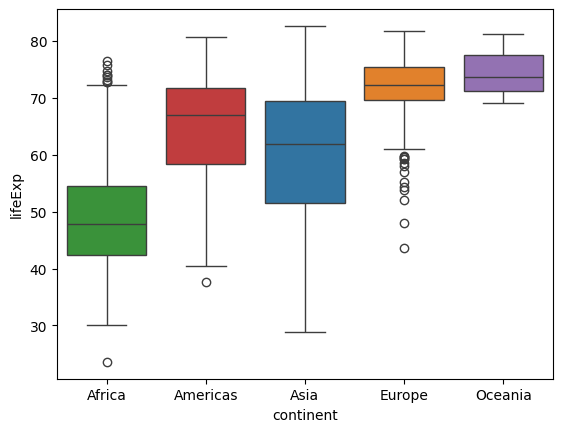

In [145]:
sns.boxplot(
    data=gapminder, 
    x='continent', 
    y='lifeExp', 
    hue='continent', 
    order= np.sort(gapminder.continent.unique())
)
plt.show()

## **EJERCICIOS GUÍA 4**: *regresión lineal y cuadrados mínimos*

### Ejercicio 1
#### a, b)

In [97]:
def coeficientes_regresion_lineal(X, y):  
    # x (predictor), y (var a predecir) pueden ser pd.Series o np.array 
    vec_x = X.to_numpy() if isinstance(X, pd.Series) else np.asarray(X)
    vec_y = y.to_numpy() if isinstance(y, pd.Series) else np.asarray(y)
    # Obtengo los promedios
    promedio_x = np.mean(vec_x)
    promedio_y = np.mean(vec_y)
    # Calculo los coeficientes
    beta_1 = np.sum((vec_x - promedio_x) * (vec_y - promedio_y)) / np.sum((vec_x - promedio_x)**2)
    beta_0 = promedio_y - (beta_1 * promedio_x)

    return beta_0, beta_1  


# Obtengo los datos
from gapminder import gapminder
datos = gapminder[gapminder['country'] == 'Argentina'].reset_index(drop=True)

# y ~ X se lee: "X explica y")
y, X = Formula('lifeExp ~ year').get_model_matrix(datos) # Obtengo las matrices del modelo 

# Genero el modelo
modelo = linear_model.LinearRegression(fit_intercept=False)
# Hago el ajuste
modelo.fit(X, y)

beta_0 =  modelo.coef_[0][0]
beta_1 =  modelo.coef_[0][1]

# Resultados
b0, b1 = coeficientes_regresion_lineal(datos.year, datos.lifeExp)
print(f'Cálculo con Formulaic y scikit-learn: beta_0 = {beta_0}, beta_1 = {beta_1}')  # Cálculo con scikit-learn
print(f'Cálculo manula: beta_0 = {b0}, beta_1 = {b1}')  # Cálculo manual
print(f'Mismos resultados: {np.isclose(beta_0, b0) and np.isclose(beta_1, b1)}')


Cálculo con Formulaic y scikit-learn: beta_0 = -389.6063445221505, beta_1 = 0.23170839160839457
Cálculo manula: beta_0 = -389.6063445221445, beta_1 = 0.2317083916083916
Mismos resultados: True


### Ejercicio 2
#### a) Relación entre superficie y precio de cada inmueble

In [98]:
ruta_a_inmuebles = (Path(os.getcwd()) / 'recs' / 'inmuebles.csv').resolve()
datos_inmuebles = pd.read_csv(ruta_a_inmuebles)
datos_inmuebles.head()

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3


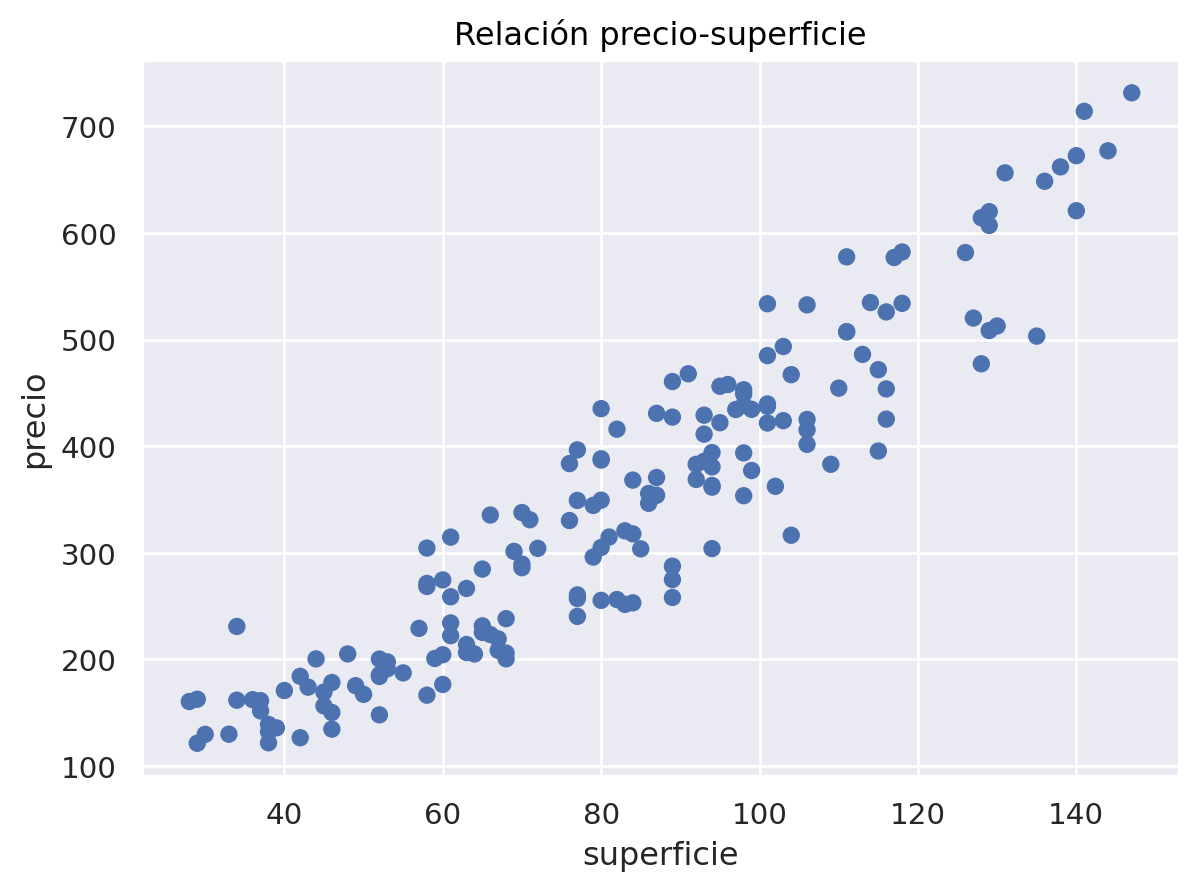

In [99]:
(
    so.Plot(datos_inmuebles, 'superficie', 'precio')
    .add(so.Dot())
    .label(
        title="Relación precio-superficie"
    )
)

#### b)

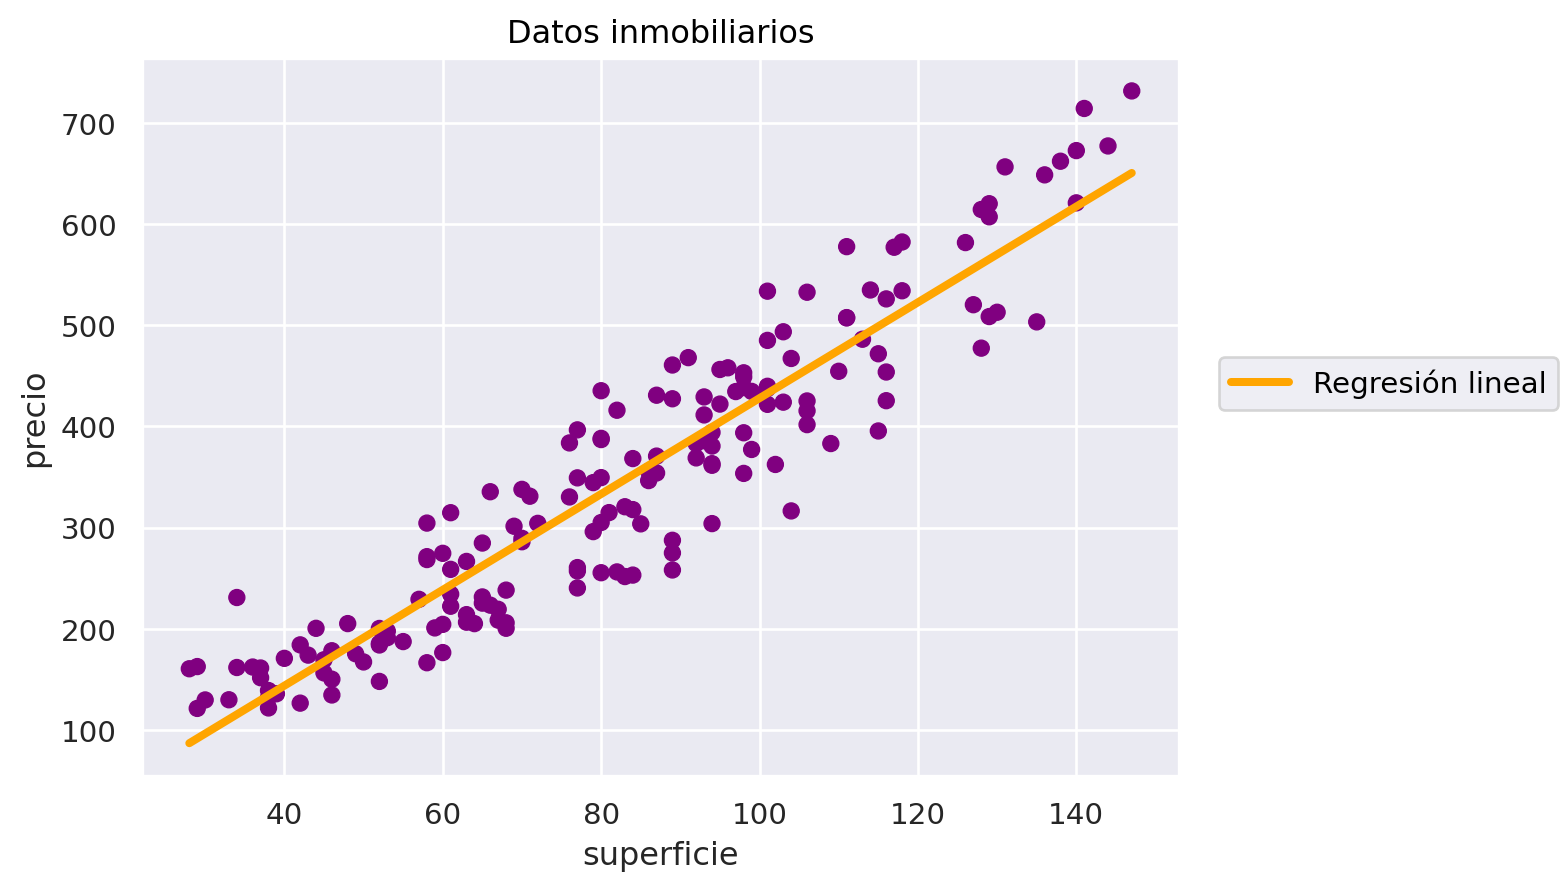

In [100]:
(
    so.Plot(datos_inmuebles, 'superficie', 'precio')
    .add(so.Dot(color='purple'))
    .add(so.Line(color='orange', linewidth=3), so.PolyFit(1), label='Regresión lineal')
    .label(
        title="Datos inmobiliarios"
    )
)

#### c)

In [109]:
# Con scikit-learn y formulaic
y, X = Formula('precio ~ superficie').get_model_matrix(datos_inmuebles)
modelo = linear_model.LinearRegression(fit_intercept=False) 
modelo.fit(X, y)
beta_0 =  modelo.coef_[0][0]
beta_1 =  modelo.coef_[0][1]

res1 = f'**Recta de ajuste**: $y = {np.round(beta_0, 3)} + {np.round(beta_1,3)}x$'
display(Markdown(res1))

**Recta de ajuste**: $y = -45.732 + 4.736x$

En este caso, la **ordenada al origen está forzada por el modelo**, los datos no pasan por ahí. Recién para inmuebles con superficie $\gtrapprox 10^2$ empezamos a obtener resultados con algún sentido: por cada metro cuadrado el precio del inmueble se incrementa en $4.736$.

#### d, e)
El **Error Cuadrático Medio** *(ECM)* mide la **magnitud del error**. Para interpretarlo correctamente le tomo **raíz cuadrada** *(RECM)*, conservando las **unidades** que heredó de $y$. El **Coeficiente de determinación** *($R^2$)* es un indicador de la **calidad** del modelo: mientras mas cerca esté de $1$, mejor será su **poder de prediccion**.

In [107]:
def ecm(x, y, pendiente, o_origen):  # x,y son Series de Panda
    y_gorrito = (x.to_numpy()*pendiente) + o_origen  # Predicciones del modelo
    residuos = y.to_numpy() - y_gorrito  # Diferencia entre cada valor real y predicho
    rss = np.sum(residuos ** 2)  # Sumatoria del cuadrado de los residuos
    ecm = rss / y.count()  # Error Cuadrático Medio
    return ecm

def r_cuadrado(x, y, pendiente, o_origen):  # x,y son Series de Panda
    y_gorrito = (x.to_numpy()*pendiente) + o_origen
    y_media = y.mean()  # Promedio de los datos observados
    ve = np.sum((y_gorrito - y_media)**2)  # Variabilidad explicada por el modelo
    vt = np.sum((y.to_numpy() - y_media)**2) # Variabilidad total (varianza muestral)
    r_cuadrado = ve / vt  # Qué tan bien se ajusta el modelo: mal-->[0,..., 1]<--bien 
    return r_cuadrado  

print(f'ECM: {ecm(datos_inmuebles.superficie, datos_inmuebles.precio, beta_1, beta_0)}')
display(Markdown(f'$R^2$: {r_cuadrado(datos_inmuebles.superficie, datos_inmuebles.precio, beta_1, beta_0)}'))

ECM: 2630.930001944696


$R^2$: 0.8762114698357918

#### f) 
**ECM** y **$R^2$** con `scikit-learn` y `formulaic`.

In [125]:
x_originales = datos_inmuebles.superficie.to_numpy()  # Extraigo los datos originales
x_a_predecir = pd.DataFrame({  
    'Intercept': np.ones(x_originales.shape),  # Le agrego una columna de unos que corresponde al intercepto
    'superficie': x_originales
})  
y_gorrito = modelo.predict(x_a_predecir)  # Aplico el modelo generado
# display(y_gorrito)  # Todo lo anterior equivale a: modelo.predict(X), con X obtenido en Formula(...)

ecm = mean_squared_error(datos_inmuebles.precio, y_gorrito)
r2 = r2_score(datos_inmuebles.precio, y_gorrito)

print(f'ECM: {ecm}')
display(Markdown(f'$R^2$: {r2}'))

ECM: 2630.930001944696


$R^2$: 0.8762114698357936

#### g)
En la zona 3 hay **mayor variabilidad** de precios.

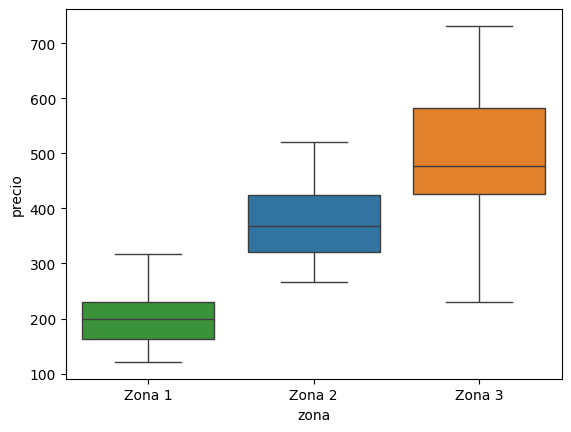

In [127]:
sns.boxplot(
    data=datos_inmuebles, 
    x='zona', 
    y='precio', 
    hue='zona', 
    order= np.sort(datos_inmuebles.zona.unique())
)
plt.show()

#### h)

In [174]:
def modelo_y_metricas_regresion_lineal(df: pd.DataFrame, x:str, y:str):
    """
    Recibe un dataframe, el nombre de la variable independiente,
    el nombre de la variable dependiente y retorna beta0, beta1, ECM, R2
    """
    # Coeficientes de la recta de ajuste
    formula_regresion = f'{y} ~ {x}'  # Notación de Wilkinson
    vector_y, matriz_X = Formula(formula_regresion).get_model_matrix(df)
    modelo = linear_model.LinearRegression(fit_intercept=False) 
    modelo.fit(matriz_X, vector_y)
    beta_0 =  modelo.coef_[0][0]
    beta_1 =  modelo.coef_[0][1]    
    # ECM y R2
    y_gorrito = modelo.predict(matriz_X)
    ecm = mean_squared_error(df[y], y_gorrito)
    r2 = r2_score(df[y], y_gorrito)
    return np.array([beta_0, beta_1, ecm, r2]) 

resultados = {}
for i in range(1,4):
    resultados[f'zona{i}'] = modelo_y_metricas_regresion_lineal(
        datos_inmuebles[datos_inmuebles['zona'] == f'Zona {i}'],
        'superficie',
        'precio'
    )

info = ''
for i in range(1,4):
    info = info + f'### **ZONA {i}** \n'
    info = info + f'\n **Recta de ajuste**: $y = {np.round(resultados[f'zona{i}'][0], 3)} + {np.round(resultados[f'zona{i}'][1],3)} x$\n'
    info = info + f'\n **ECM**: {np.round(resultados[f'zona{i}'][2], 3)} \n'
    info = info + f'\n $R^2$: {np.round(resultados[f'zona{i}'][3], 3)}\n'
    
display(Markdown(info))   

### **ZONA 1** 

 **Recta de ajuste**: $y = 58.852 + 2.442 x$

 **ECM**: 331.227 

 $R^2$: 0.856
### **ZONA 2** 

 **Recta de ajuste**: $y = 80.73 + 3.206 x$

 **ECM**: 611.496 

 $R^2$: 0.866
### **ZONA 3** 

 **Recta de ajuste**: $y = 24.966 + 4.561 x$

 **ECM**: 748.88 

 $R^2$: 0.945


#### i)
El valor del metro cuadrado en cada zona es igual al valor de la **pendiente**.

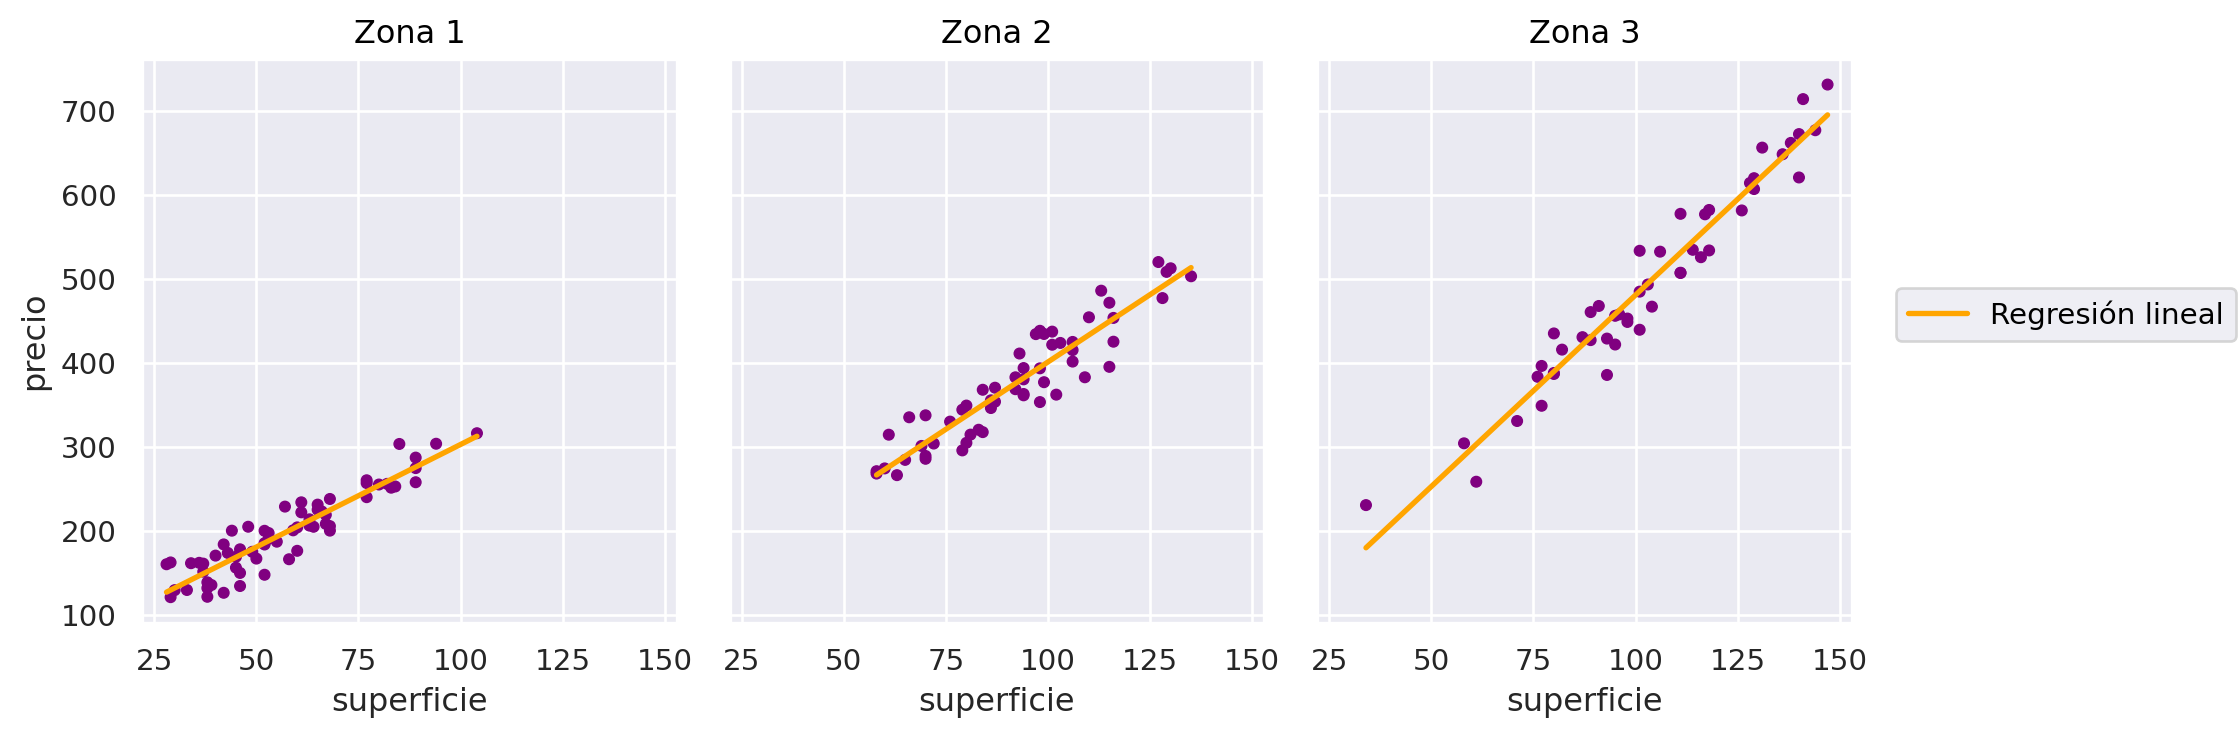

In [187]:
(
    so.Plot(data=datos_inmuebles, x='superficie', y='precio')
    .add(so.Dot(color='purple', pointsize=4))
    .add(so.Line(color='orange', linewidth=2), so.PolyFit(1), label='Regresión lineal')
    .facet('zona', order =np.sort(datos_inmuebles.zona.unique()))
    .layout(size=(10, 4))
)

#### j)

In [195]:
valor_a_predecir = np.array([105])  # Depto con 105m2 de superficie
dataframe_a_predecir = pd.DataFrame({'Intercept': np.array([1]), 'superficie': valor_a_predecir})

# Uso  el modelo creado en punto c)
precio_gral = np.round(modelo.predict(dataframe_a_predecir).item(), 3)  
# Uso directamente beta0 y beta1 obtenidos en el punto h)
precio_en_zona2 =  np.round(resultados['zona2'][0] + resultados['zona2'][1]*valor_a_predecir.item(), 3)  

display(Markdown(f'**Precio general**: {precio_gral}\n\n**Precio en zona 2**: {precio_en_zona2}'))


**Precio general**: 451.527

**Precio en zona 2**: 417.389

#### k)

In [207]:
m2_depto = 100
precio_oferta = 300
precio_ref =  np.round(resultados['zona2'][0] + resultados['zona2'][1]*m2_depto, 3)
comparacion = f'El precio de oferta es ${abs(precio_oferta - precio_ref)} más {'caro' if precio_oferta - precio_ref >= 0 else 'barato'}'
comparacion = comparacion + ' que el precio de referencia.'
print(comparacion)

El precio de oferta es $101.358 más barato que el precio de referencia.


#### l)

In [208]:
ruta_a_inmuebles_outliers = (Path(os.getcwd()) / 'recs' / 'inmuebles_outliers.csv').resolve()
datos_inmuebles_out = pd.read_csv(ruta_a_inmuebles_outliers)
datos_inmuebles_out.head()

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3


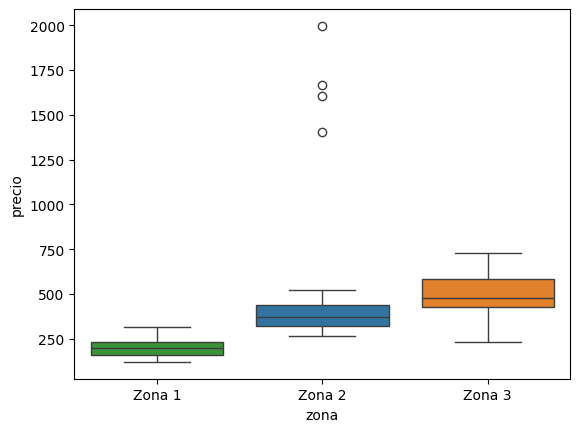

In [209]:
sns.boxplot(
    data=datos_inmuebles_out, 
    x='zona', 
    y='precio', 
    hue='zona', 
    order= np.sort(datos_inmuebles_out.zona.unique())
)
plt.show()

In [211]:
resultados_con_outliers = {}
for i in range(1,4):
    resultados_con_outliers[f'zona{i}'] = modelo_y_metricas_regresion_lineal(
        datos_inmuebles_out[datos_inmuebles_out['zona'] == f'Zona {i}'],
        'superficie',
        'precio'
    )

info_out = ''
for i in range(1,4):
    info_out = info_out + f'### **ZONA {i}** \n'
    info_out = info_out + f'\n **Recta de ajuste**: $y = {np.round(resultados_con_outliers[f'zona{i}'][0], 3)} + {np.round(resultados_con_outliers[f'zona{i}'][1],3)} x$\n'
    info_out = info_out + f'\n **ECM**: {np.round(resultados_con_outliers[f'zona{i}'][2], 3)} \n'
    info_out = info_out + f'\n $R^2$: {np.round(resultados_con_outliers[f'zona{i}'][3], 3)}\n'
    
display(Markdown(info_out))  

### **ZONA 1** 

 **Recta de ajuste**: $y = 58.852 + 2.442 x$

 **ECM**: 331.227 

 $R^2$: 0.856
### **ZONA 2** 

 **Recta de ajuste**: $y = 72.894 + 4.267 x$

 **ECM**: 109771.983 

 $R^2$: 0.06
### **ZONA 3** 

 **Recta de ajuste**: $y = 24.966 + 4.561 x$

 **ECM**: 748.88 

 $R^2$: 0.945


### Ejercicio 3
#### a)

In [250]:
datos_propinas = sns.load_dataset('tips')
datos_propinas.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [255]:
promedio_props = datos_propinas['tip'].mean()

datos_centrados = pd.DataFrame({
    'propina': datos_propinas.tip,
    'desvio_de_la_media': datos_propinas['total_bill'].to_numpy() - datos_propinas['total_bill'].mean() 
})

vector_y, matriz_X = Formula('propina ~ desvio_de_la_media').get_model_matrix(datos_centrados)
modelo = linear_model.LinearRegression(fit_intercept=False) 
modelo.fit(matriz_X, vector_y)
beta_0 =  modelo.coef_[0][0]  # Al centrar los datos resulta ser igual a la propina promedio
beta_1 =  modelo.coef_[0][1]  # Centrar la variable predictora no cambia la pendiente
display(Markdown(rf'$\beta_0$: {np.round(beta_0,3)}, $\beta_1$ {np.round(beta_1,3)}'))
print(f'Propina promedio = {promedio_props}')

$\beta_0$: 2.998, $\beta_1$ 0.105

Propina promedio = 2.99827868852459


#### b)

In [254]:
vector_y, matriz_X = Formula('tip ~ total_bill').get_model_matrix(datos_propinas)
modelo = linear_model.LinearRegression(fit_intercept=False) 
modelo.fit(matriz_X, vector_y)
beta_0 =  modelo.coef_[0][0]
beta_1 =  modelo.coef_[0][1]
display(Markdown(rf'$\beta_0$: {np.round(beta_0,3)}, $\beta_1$ {np.round(beta_1,3)}'))

$\beta_0$: 0.92, $\beta_1$ 0.105

### Ejercicio 4

In [256]:
ruta_a_bitcoin = (Path(os.getcwd()) / 'recs' / 'bitcoin.csv').resolve()
df_bitcoin = pd.read_csv(ruta_a_bitcoin)  # Cotización desde el 17/09/2014 hasta el 19/02/2022 
df_bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


        Date         Close
0 2021-01-01  29374.152344
1 2021-01-02  32127.267578
2 2021-01-03  32782.023438
3 2021-01-04  31971.914063
4 2021-01-05  33992.429688


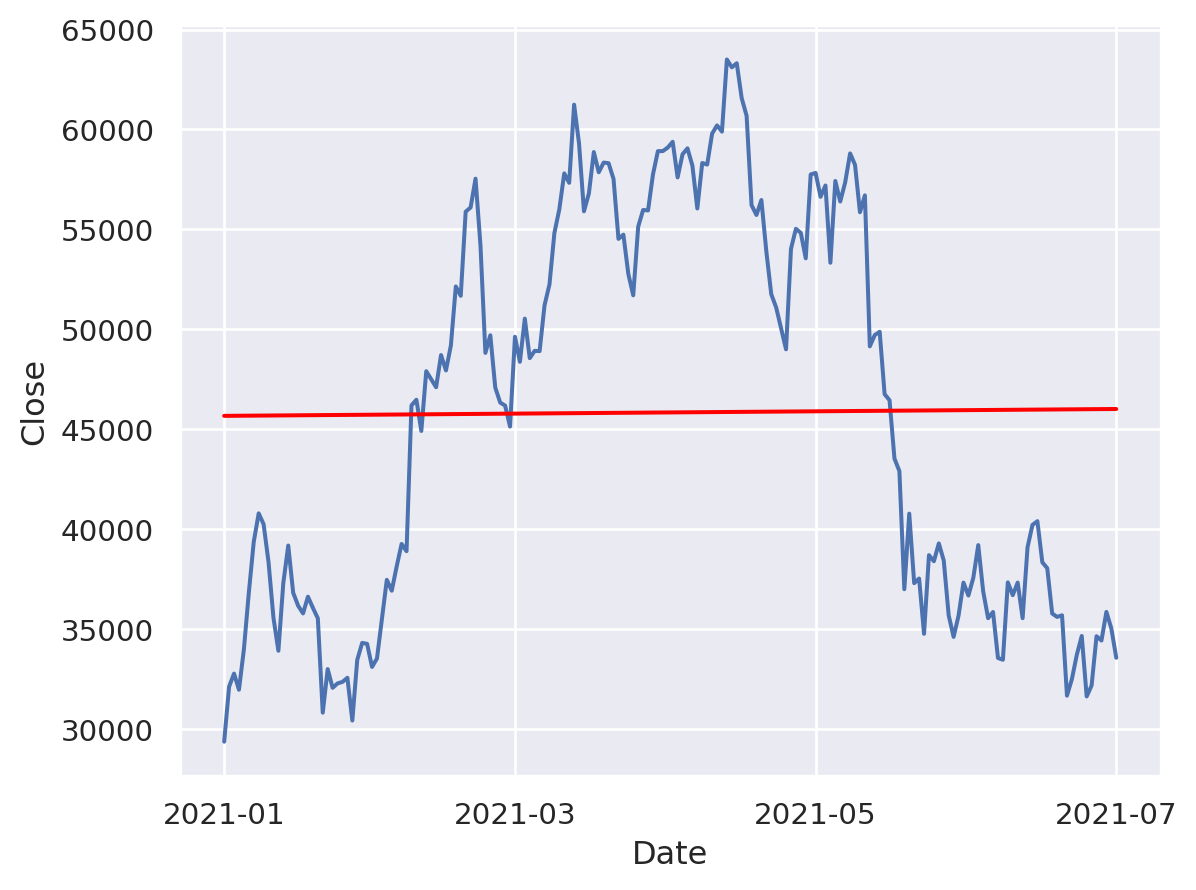

In [301]:
btc_2021 = df_bitcoin.loc[  # Recomandado para seleccionar filas y columnas por etiquetas o condiciones booleanas
    (df_bitcoin['Date'] >= "2021-01-01") &  (df_bitcoin['Date'] <= "2021-07-01"),  # Rango de fechas seleccionadas 
    ['Date', 'Close']  # El dataframe solo conserva estas columnas
].reset_index(drop=True)  # Reinicio el valor de los indices
btc_2021['Date'] = pd.to_datetime(btc_2021['Date']) # Convierte de object a datetime
#  print(btc_2021['Date'].dtype)  # Para verificar el tipo de dato de la columna 'Date'
print(btc_2021.head())

(
    so.Plot(btc_2021,'Date','Close')
    .add(so.Line())
    .add(so.Line(color='red'), so.PolyFit(1))  # La regresión lineal resulta insuficiente
)

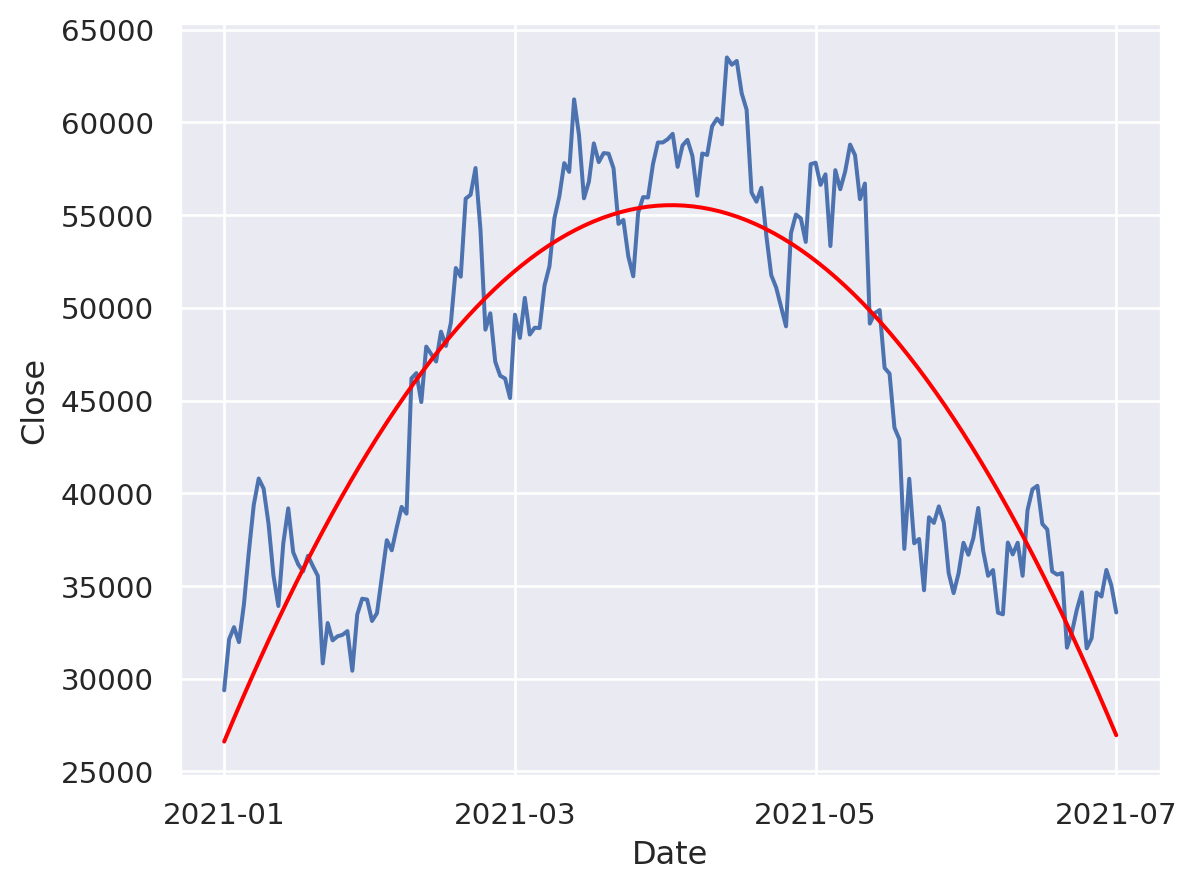

In [302]:
(
    so.Plot(btc_2021,'Date','Close')
    .add(so.Line())
    .add(so.Line(color='red'), so.PolyFit(2))  # Regresión con polinomio de grado 2
)